In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import math
from scipy.fft import fft
from scipy.integrate import cumulative_trapezoid as cumtrapz
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

In [224]:
rcar = pd.read_csv('../P4/IMU/shots/Vicon/Actual_P4_01.csv')
print(rcar)

           X       Y       Z
0    -925.64 4077.25 1056.93
1    -925.52 4077.59 1056.89
2    -925.38 4077.91 1056.77
3    -925.27 4078.19 1056.65
4    -925.13 4078.56 1056.49
...      ...     ...     ...
1120 -364.09 1551.26  863.86
1121 -360.57 1575.40  866.52
1122 -357.48 1599.30  869.56
1123 -355.05 1623.16  872.79
1124 -352.95 1646.77  876.32

[1125 rows x 3 columns]


First 10 changes in gradient for Shot1.csv (excluding the first 50 points):
Time: 5.47 s, Acceleration Z: 0.15, Change in Gradient: -17.30
Time: 5.48 s, Acceleration Z: -0.18, Change in Gradient: 31.00
Time: 5.49 s, Acceleration Z: 0.27, Change in Gradient: -37.53
Time: 5.50 s, Acceleration Z: -0.68, Change in Gradient: -12.40
Time: 5.51 s, Acceleration Z: -0.43, Change in Gradient: 71.90
Time: 5.52 s, Acceleration Z: -0.19, Change in Gradient: 10.52
Time: 5.53 s, Acceleration Z: 0.23, Change in Gradient: -17.85
Time: 5.53 s, Acceleration Z: 0.18, Change in Gradient: -23.58
Time: 6.07 s, Acceleration Z: 3.14, Change in Gradient: 12.30
Time: 6.08 s, Acceleration Z: 3.27, Change in Gradient: -10.19

Absolute maximum change in gradient: 71.90 at Time: 5.51 s



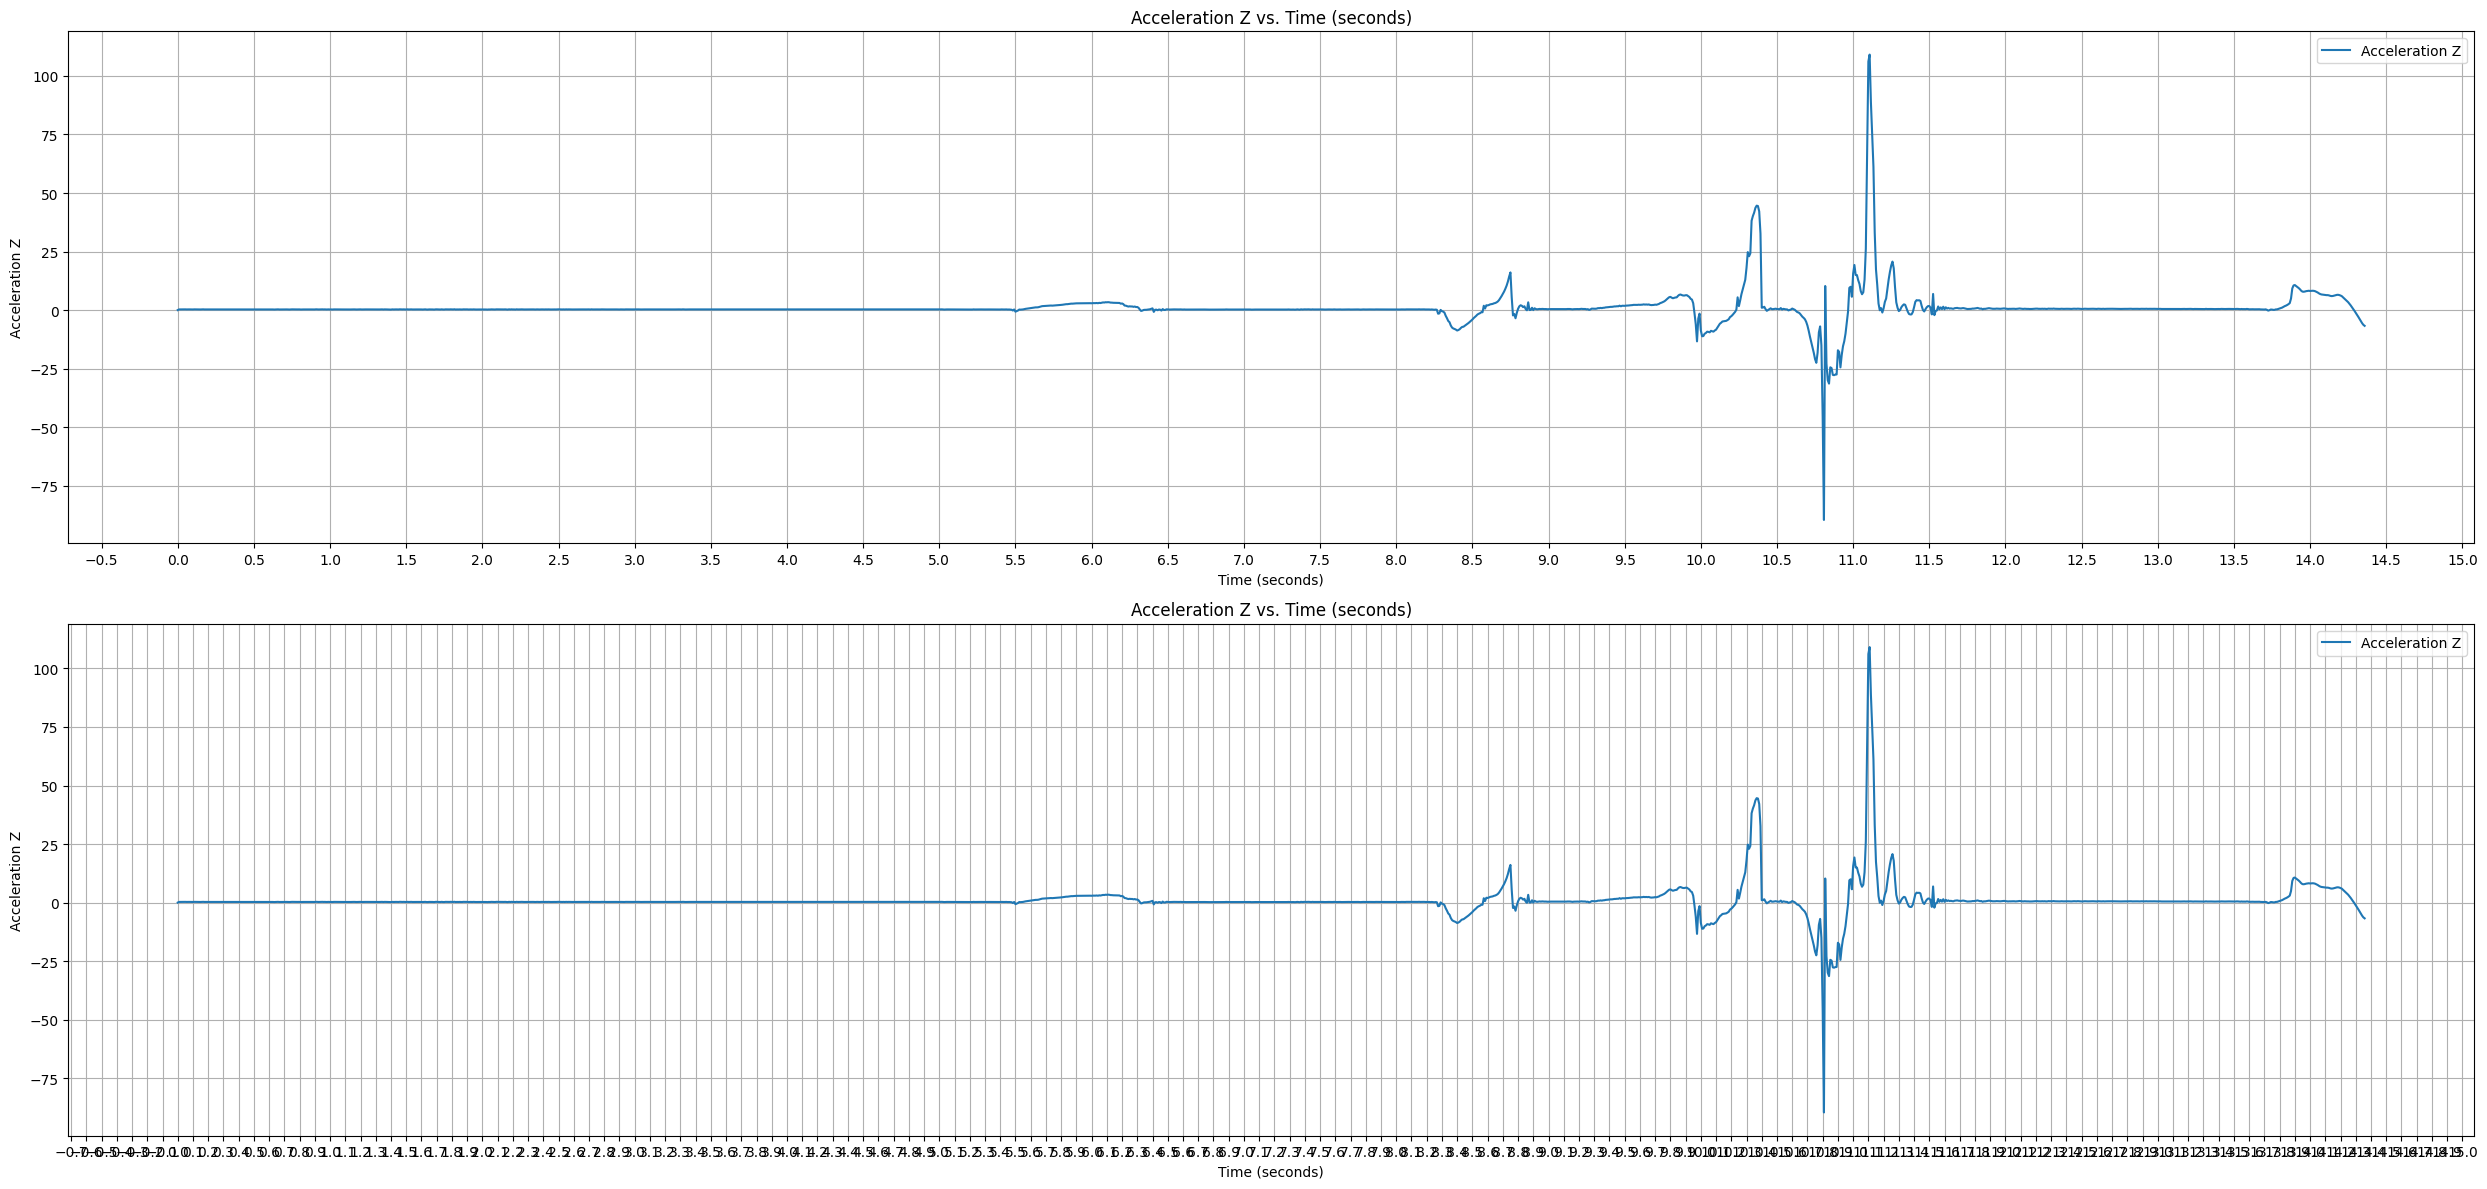

First 10 changes in gradient for Shot10.csv (excluding the first 50 points):
Time: 3.54 s, Acceleration Z: 0.07, Change in Gradient: 14.38
Time: 3.55 s, Acceleration Z: 0.25, Change in Gradient: -40.97
Time: 3.58 s, Acceleration Z: -1.37, Change in Gradient: 125.37
Time: 3.59 s, Acceleration Z: -0.21, Change in Gradient: 27.72
Time: 3.60 s, Acceleration Z: 0.22, Change in Gradient: -80.50
Time: 3.61 s, Acceleration Z: 0.05, Change in Gradient: -24.23
Time: 3.62 s, Acceleration Z: 0.07, Change in Gradient: 12.86
Time: 3.73 s, Acceleration Z: 1.68, Change in Gradient: 12.41
Time: 3.75 s, Acceleration Z: 2.33, Change in Gradient: -20.72
Time: 3.98 s, Acceleration Z: 4.68, Change in Gradient: -12.65

Absolute maximum change in gradient: 125.37 at Time: 3.58 s



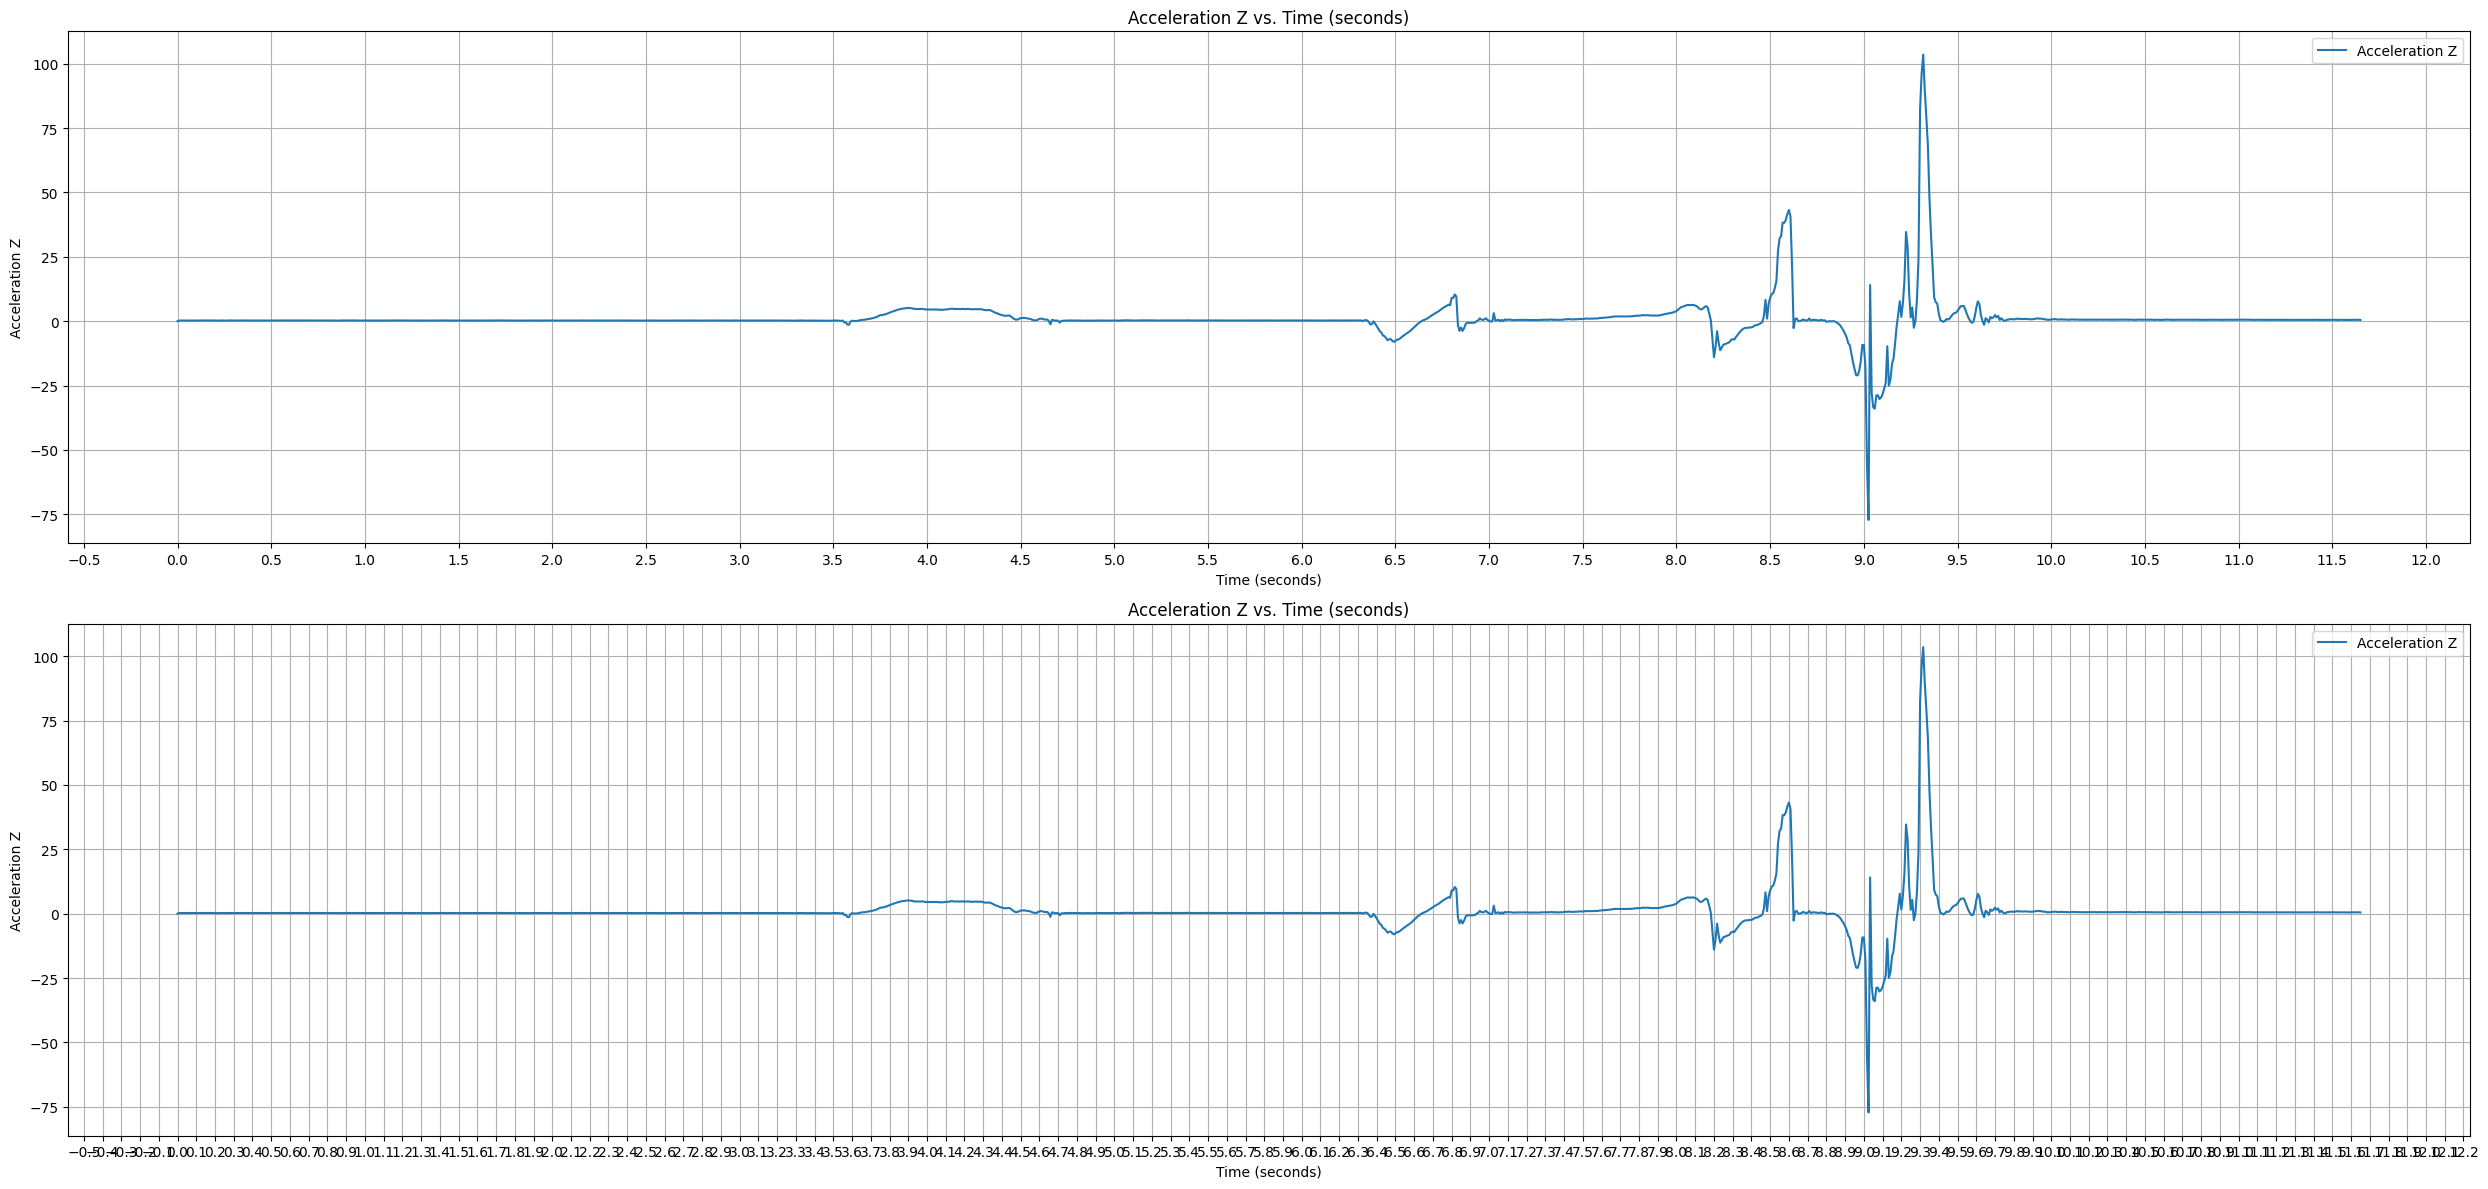

First 10 changes in gradient for Shot2.csv (excluding the first 50 points):
Time: 4.47 s, Acceleration Z: 0.19, Change in Gradient: 10.28
Time: 5.62 s, Acceleration Z: 0.03, Change in Gradient: 12.68
Time: 5.64 s, Acceleration Z: 0.10, Change in Gradient: -40.80
Time: 5.66 s, Acceleration Z: -0.35, Change in Gradient: 35.56
Time: 5.67 s, Acceleration Z: -0.27, Change in Gradient: 23.62
Time: 5.69 s, Acceleration Z: 0.13, Change in Gradient: -30.45
Time: 5.70 s, Acceleration Z: 0.08, Change in Gradient: 13.04
Time: 5.90 s, Acceleration Z: 2.53, Change in Gradient: 10.98
Time: 6.33 s, Acceleration Z: 2.90, Change in Gradient: -16.06
Time: 6.34 s, Acceleration Z: 2.55, Change in Gradient: 11.05

Absolute maximum change in gradient: -40.80 at Time: 5.64 s



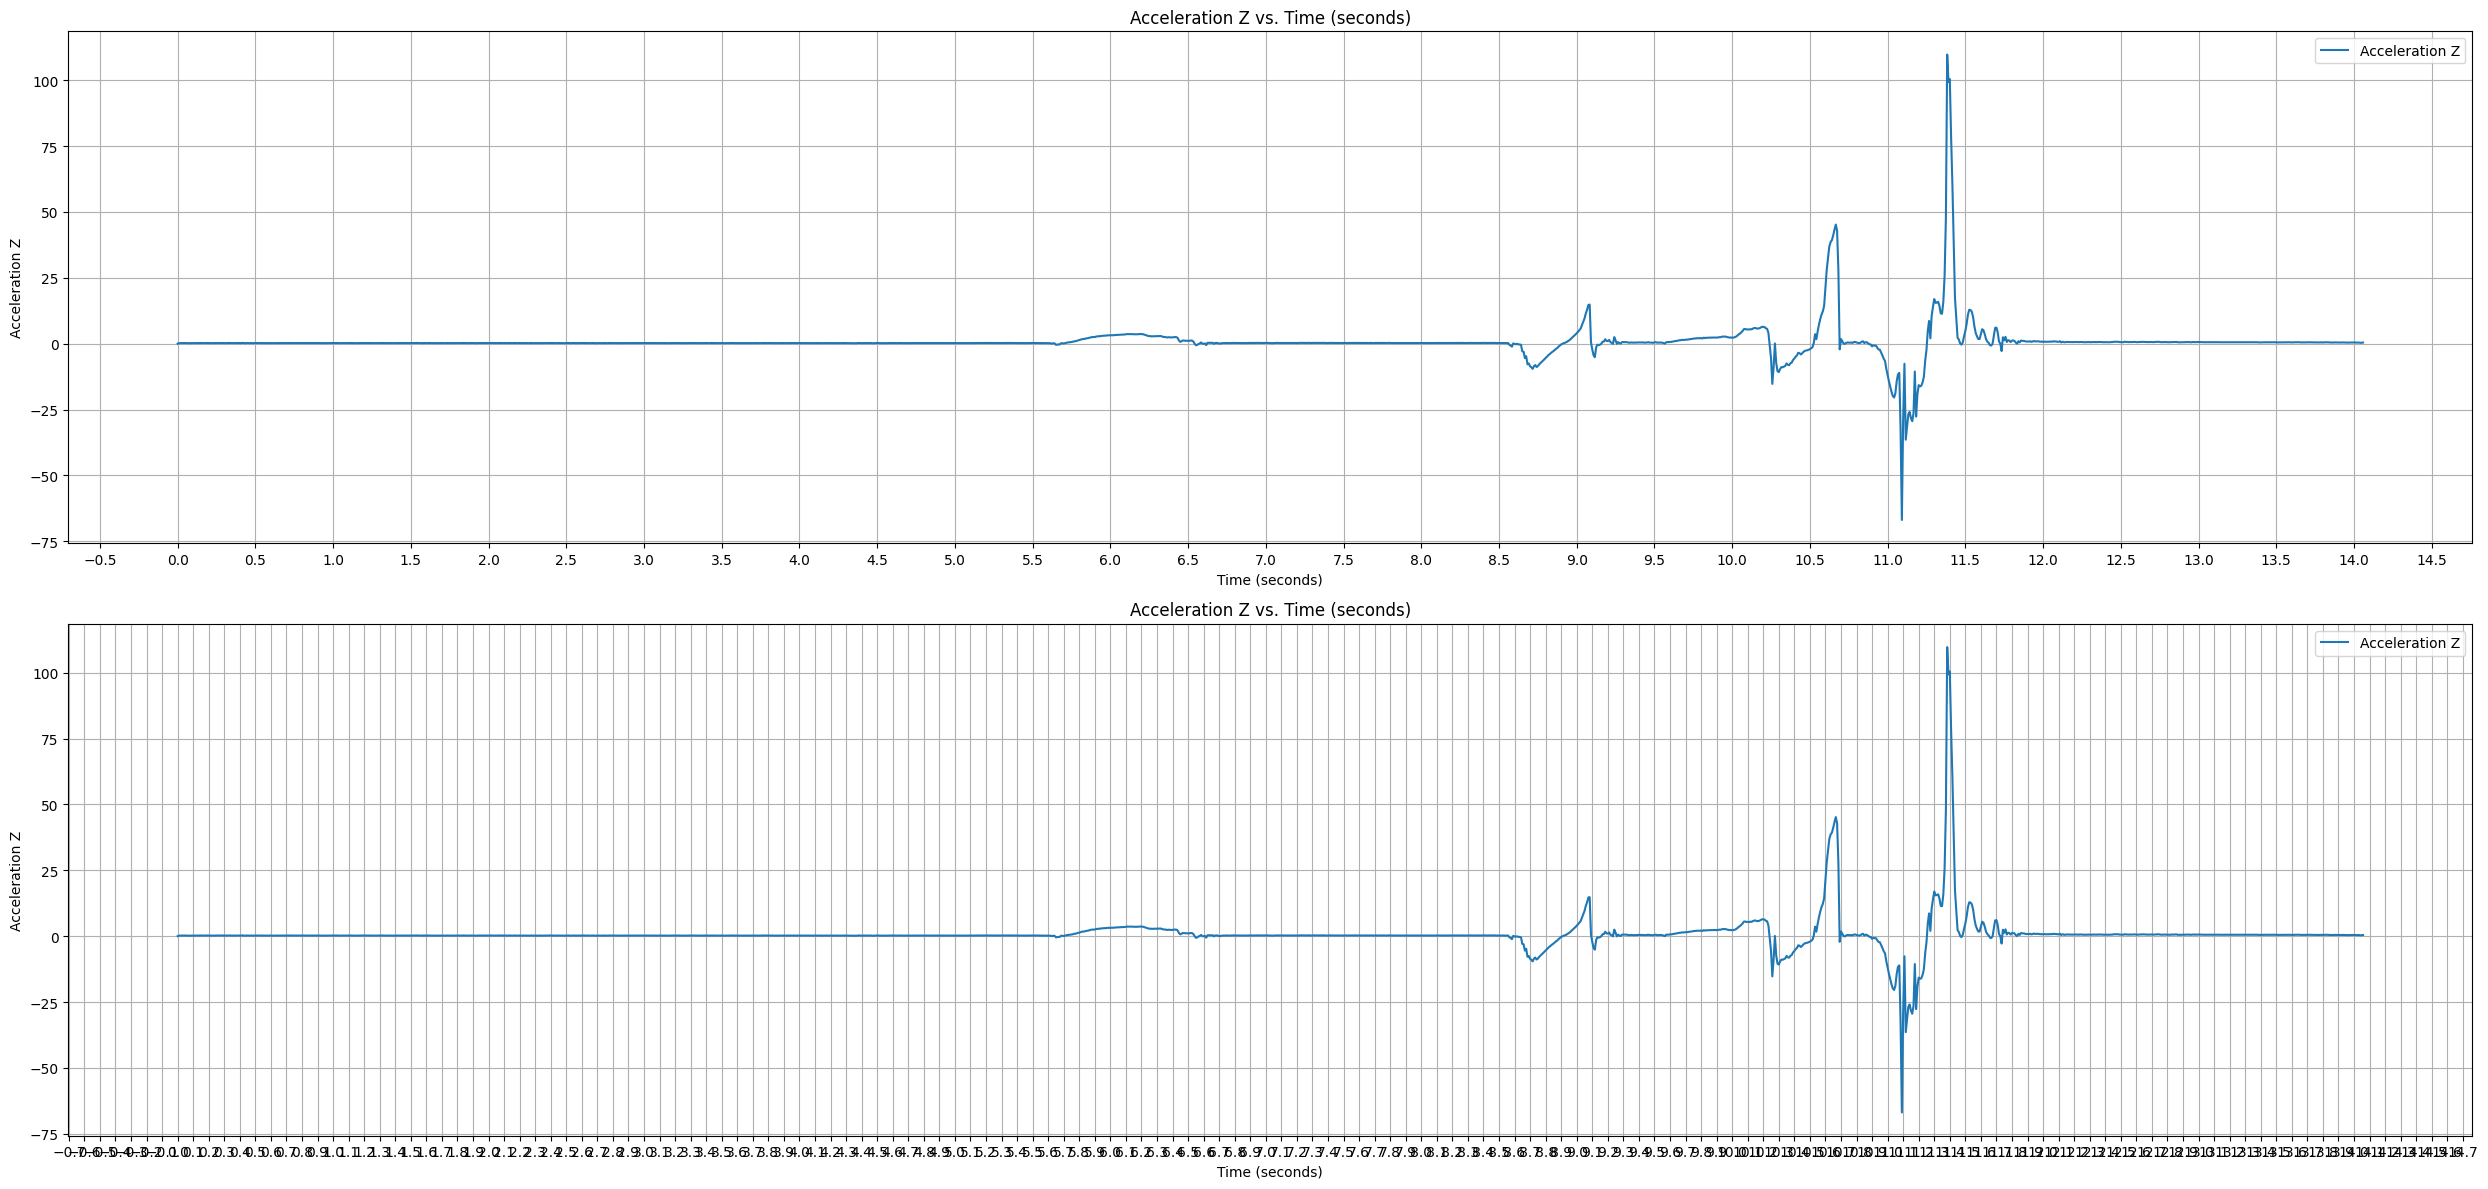

First 10 changes in gradient for Shot3.csv (excluding the first 50 points):
Time: 0.88 s, Acceleration Z: 0.16, Change in Gradient: 12.35
Time: 4.32 s, Acceleration Z: 0.12, Change in Gradient: 14.13
Time: 4.35 s, Acceleration Z: 0.27, Change in Gradient: -12.13
Time: 4.37 s, Acceleration Z: 0.23, Change in Gradient: -10.03
Time: 4.38 s, Acceleration Z: -0.12, Change in Gradient: -21.48
Time: 4.38 s, Acceleration Z: -0.33, Change in Gradient: -44.24
Time: 4.39 s, Acceleration Z: -1.42, Change in Gradient: 68.66
Time: 4.40 s, Acceleration Z: -0.49, Change in Gradient: 116.53
Time: 4.41 s, Acceleration Z: 0.36, Change in Gradient: -65.83
Time: 4.42 s, Acceleration Z: 0.20, Change in Gradient: -61.00

Absolute maximum change in gradient: 116.53 at Time: 4.40 s



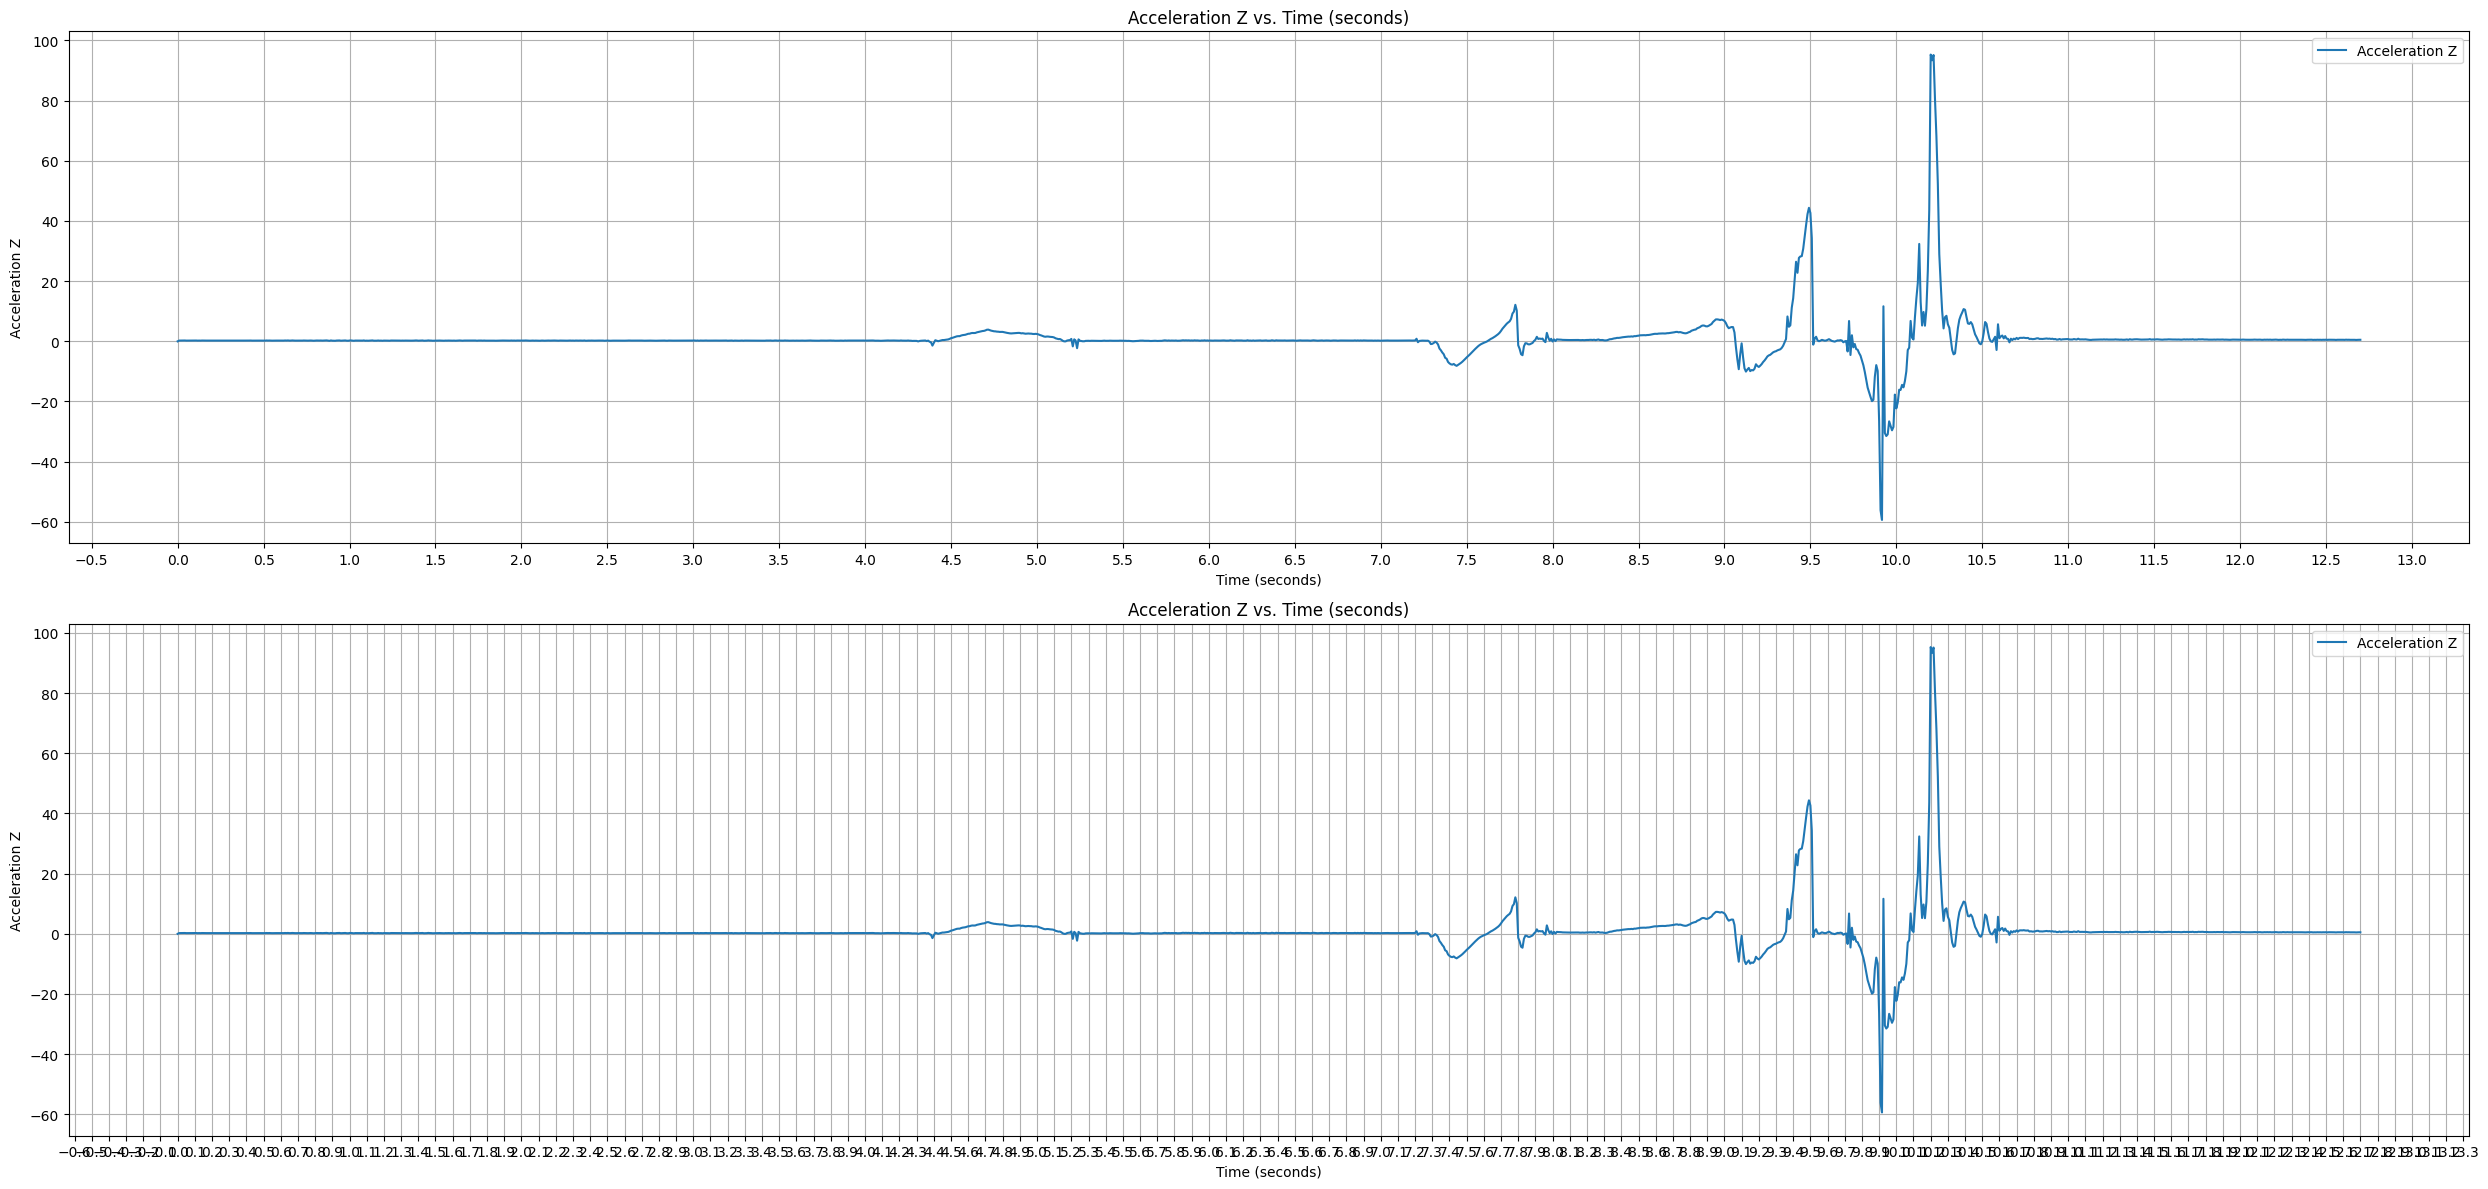

First 10 changes in gradient for Shot4.csv (excluding the first 50 points):
Time: 3.95 s, Acceleration Z: -0.08, Change in Gradient: -23.62
Time: 3.96 s, Acceleration Z: -0.49, Change in Gradient: 18.05
Time: 3.97 s, Acceleration Z: -0.35, Change in Gradient: 31.19
Time: 3.98 s, Acceleration Z: -0.23, Change in Gradient: -26.81
Time: 3.98 s, Acceleration Z: -0.55, Change in Gradient: 34.53
Time: 3.99 s, Acceleration Z: 0.15, Change in Gradient: 19.18
Time: 4.00 s, Acceleration Z: 0.15, Change in Gradient: -41.32
Time: 4.15 s, Acceleration Z: 2.39, Change in Gradient: -27.08
Time: 4.17 s, Acceleration Z: 2.43, Change in Gradient: 14.22
Time: 4.18 s, Acceleration Z: 2.65, Change in Gradient: 16.37

Absolute maximum change in gradient: -41.32 at Time: 4.00 s



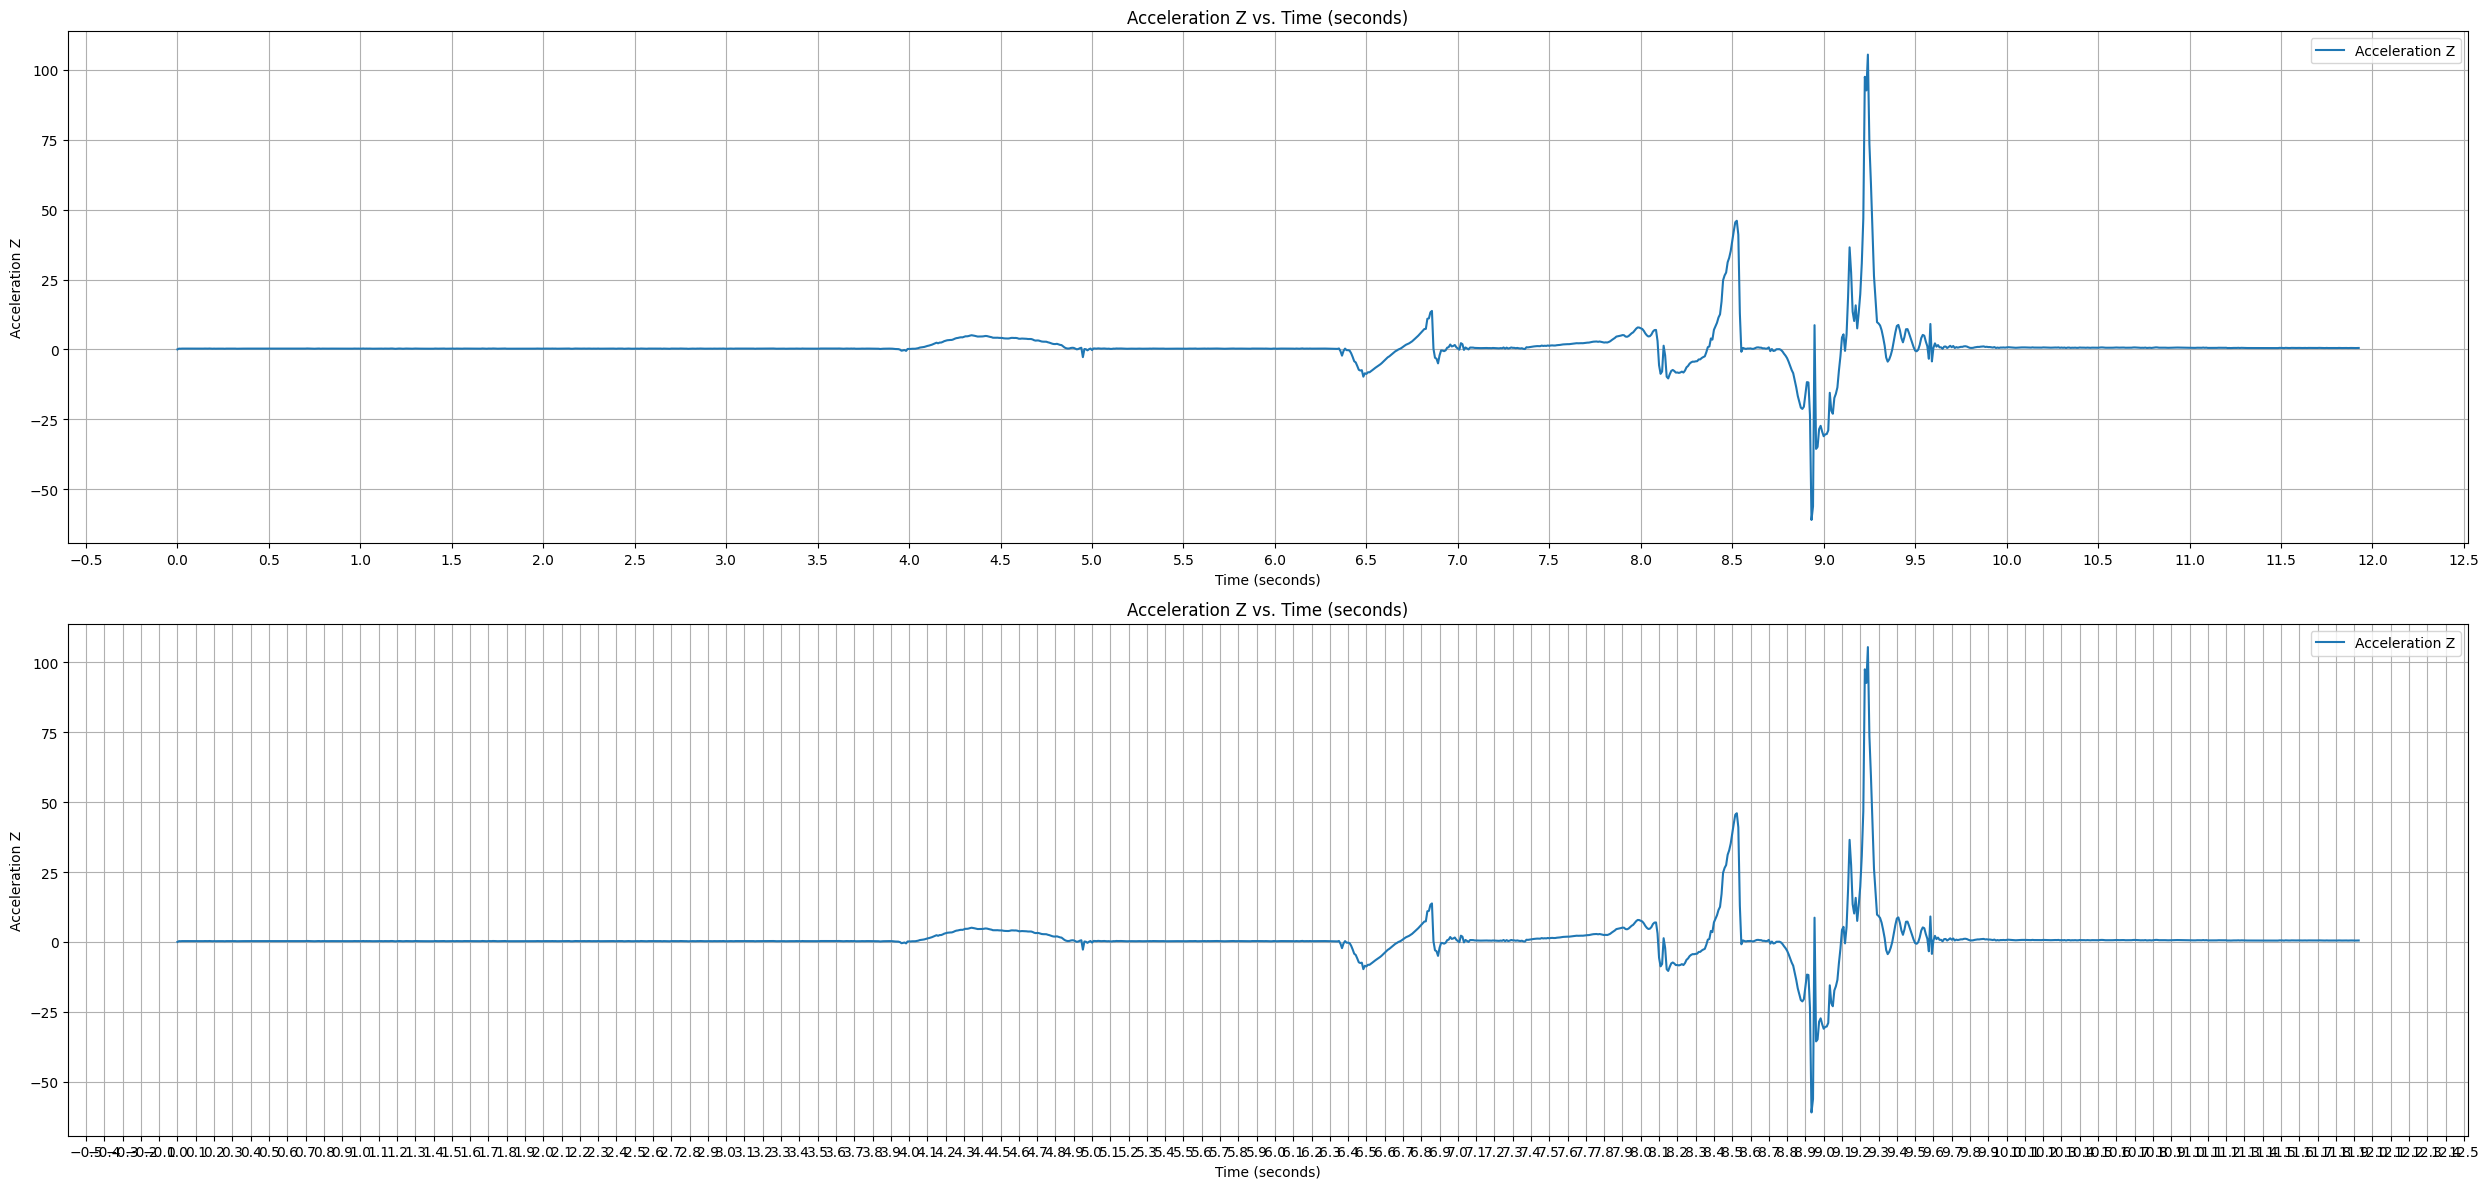

First 10 changes in gradient for Shot5.csv (excluding the first 50 points):
Time: 3.95 s, Acceleration Z: -0.08, Change in Gradient: -23.62
Time: 3.96 s, Acceleration Z: -0.49, Change in Gradient: 18.05
Time: 3.97 s, Acceleration Z: -0.35, Change in Gradient: 31.19
Time: 3.98 s, Acceleration Z: -0.23, Change in Gradient: -26.81
Time: 3.98 s, Acceleration Z: -0.55, Change in Gradient: 34.53
Time: 3.99 s, Acceleration Z: 0.15, Change in Gradient: 19.18
Time: 4.00 s, Acceleration Z: 0.15, Change in Gradient: -41.32
Time: 4.15 s, Acceleration Z: 2.39, Change in Gradient: -27.08
Time: 4.17 s, Acceleration Z: 2.43, Change in Gradient: 14.22
Time: 4.18 s, Acceleration Z: 2.65, Change in Gradient: 16.37

Absolute maximum change in gradient: -41.32 at Time: 4.00 s



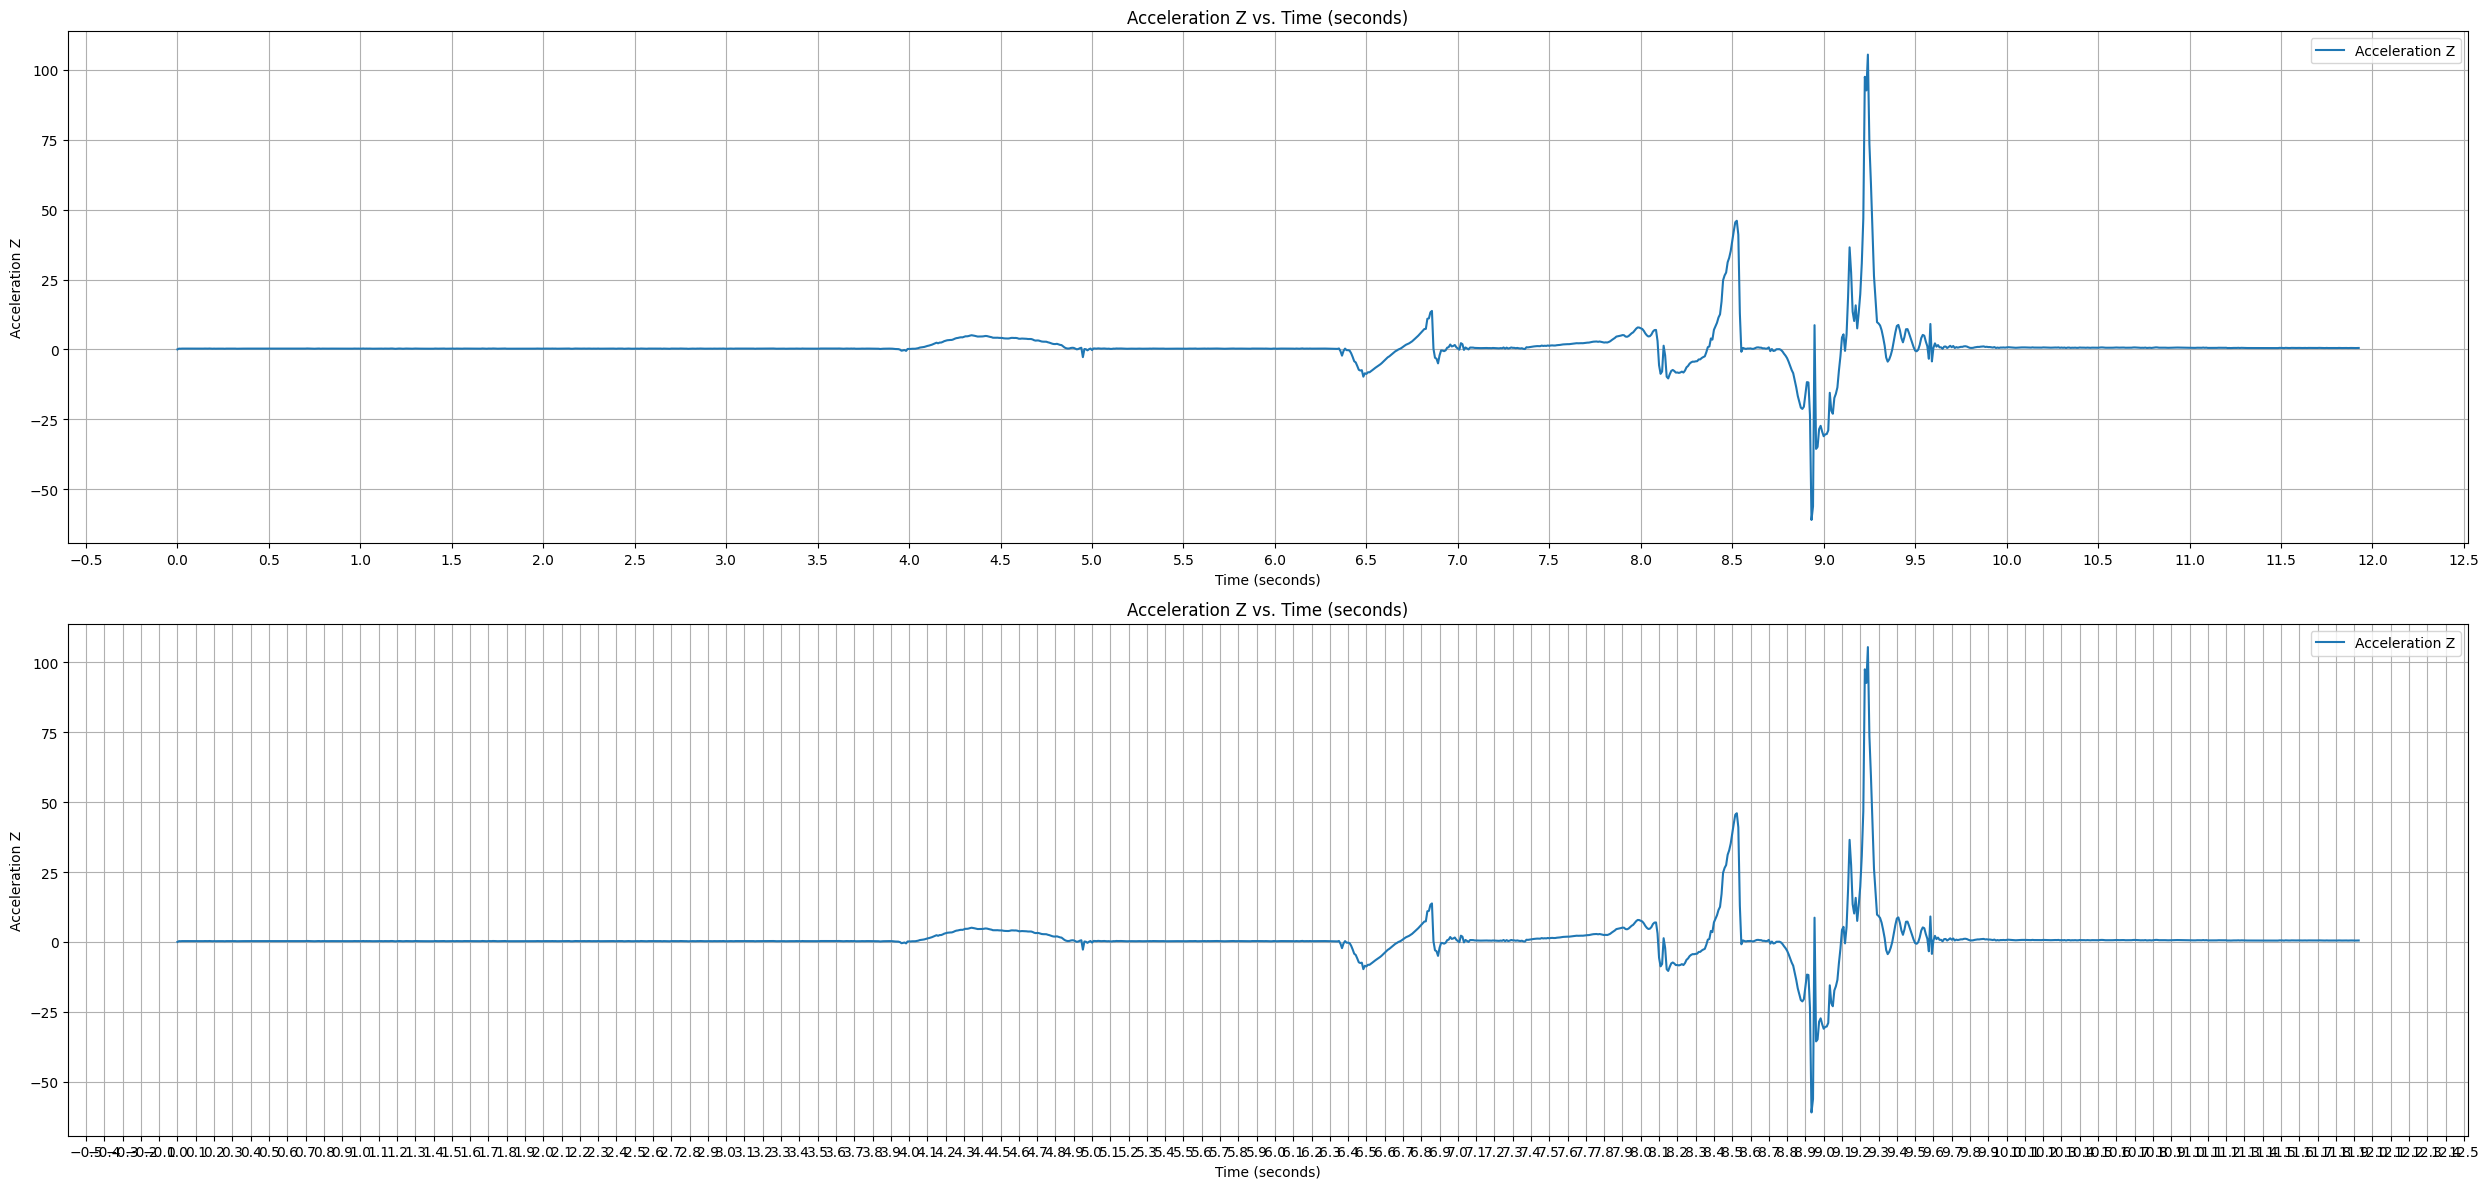

First 10 changes in gradient for Shot6.csv (excluding the first 50 points):
Time: 4.48 s, Acceleration Z: -0.18, Change in Gradient: -58.52
Time: 4.49 s, Acceleration Z: -1.14, Change in Gradient: 24.84
Time: 4.50 s, Acceleration Z: -0.88, Change in Gradient: 115.15
Time: 4.51 s, Acceleration Z: 0.08, Change in Gradient: -11.27
Time: 4.52 s, Acceleration Z: 0.15, Change in Gradient: -52.99
Time: 4.54 s, Acceleration Z: 0.26, Change in Gradient: 12.63
Time: 4.74 s, Acceleration Z: 2.21, Change in Gradient: 15.27
Time: 4.76 s, Acceleration Z: 2.41, Change in Gradient: -11.24
Time: 4.88 s, Acceleration Z: 4.20, Change in Gradient: -12.10
Time: 4.94 s, Acceleration Z: 4.08, Change in Gradient: 10.54

Absolute maximum change in gradient: 115.15 at Time: 4.50 s



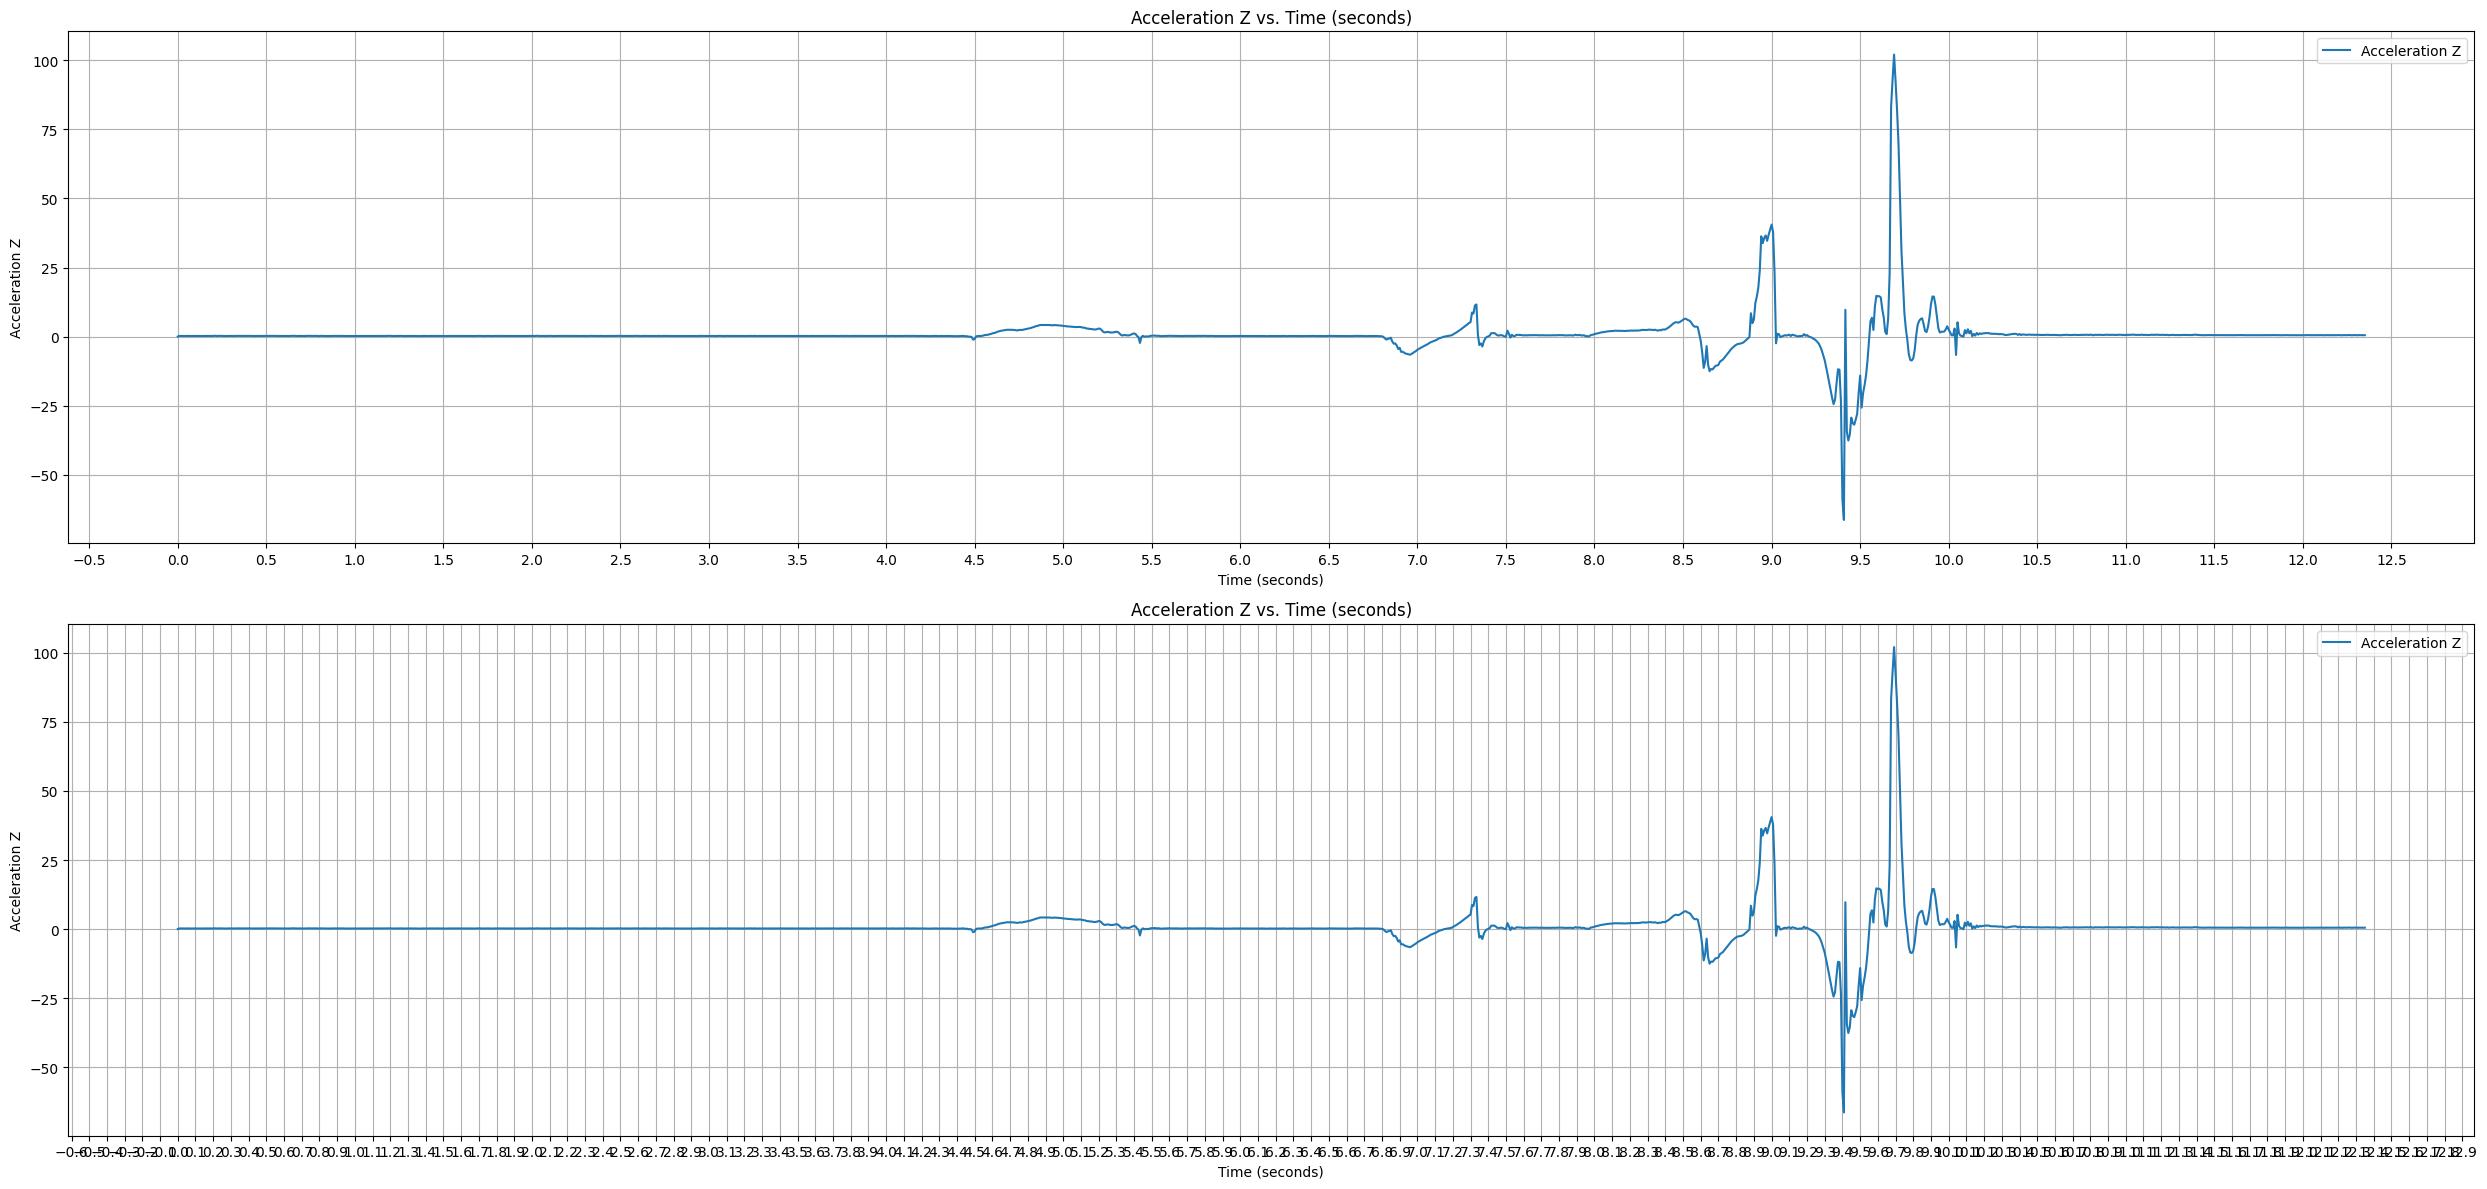

First 10 changes in gradient for Shot7.csv (excluding the first 50 points):
Time: 4.48 s, Acceleration Z: 0.07, Change in Gradient: -14.48
Time: 4.49 s, Acceleration Z: -0.22, Change in Gradient: 14.87
Time: 4.50 s, Acceleration Z: -0.06, Change in Gradient: -72.31
Time: 4.51 s, Acceleration Z: -1.56, Change in Gradient: 60.92
Time: 4.52 s, Acceleration Z: -0.38, Change in Gradient: 43.01
Time: 4.53 s, Acceleration Z: -0.07, Change in Gradient: 53.67
Time: 4.54 s, Acceleration Z: 0.04, Change in Gradient: -71.73
Time: 4.56 s, Acceleration Z: 0.10, Change in Gradient: 15.56
Time: 4.72 s, Acceleration Z: 2.96, Change in Gradient: -17.02
Time: 4.72 s, Acceleration Z: 2.76, Change in Gradient: 19.53

Absolute maximum change in gradient: -72.31 at Time: 4.50 s



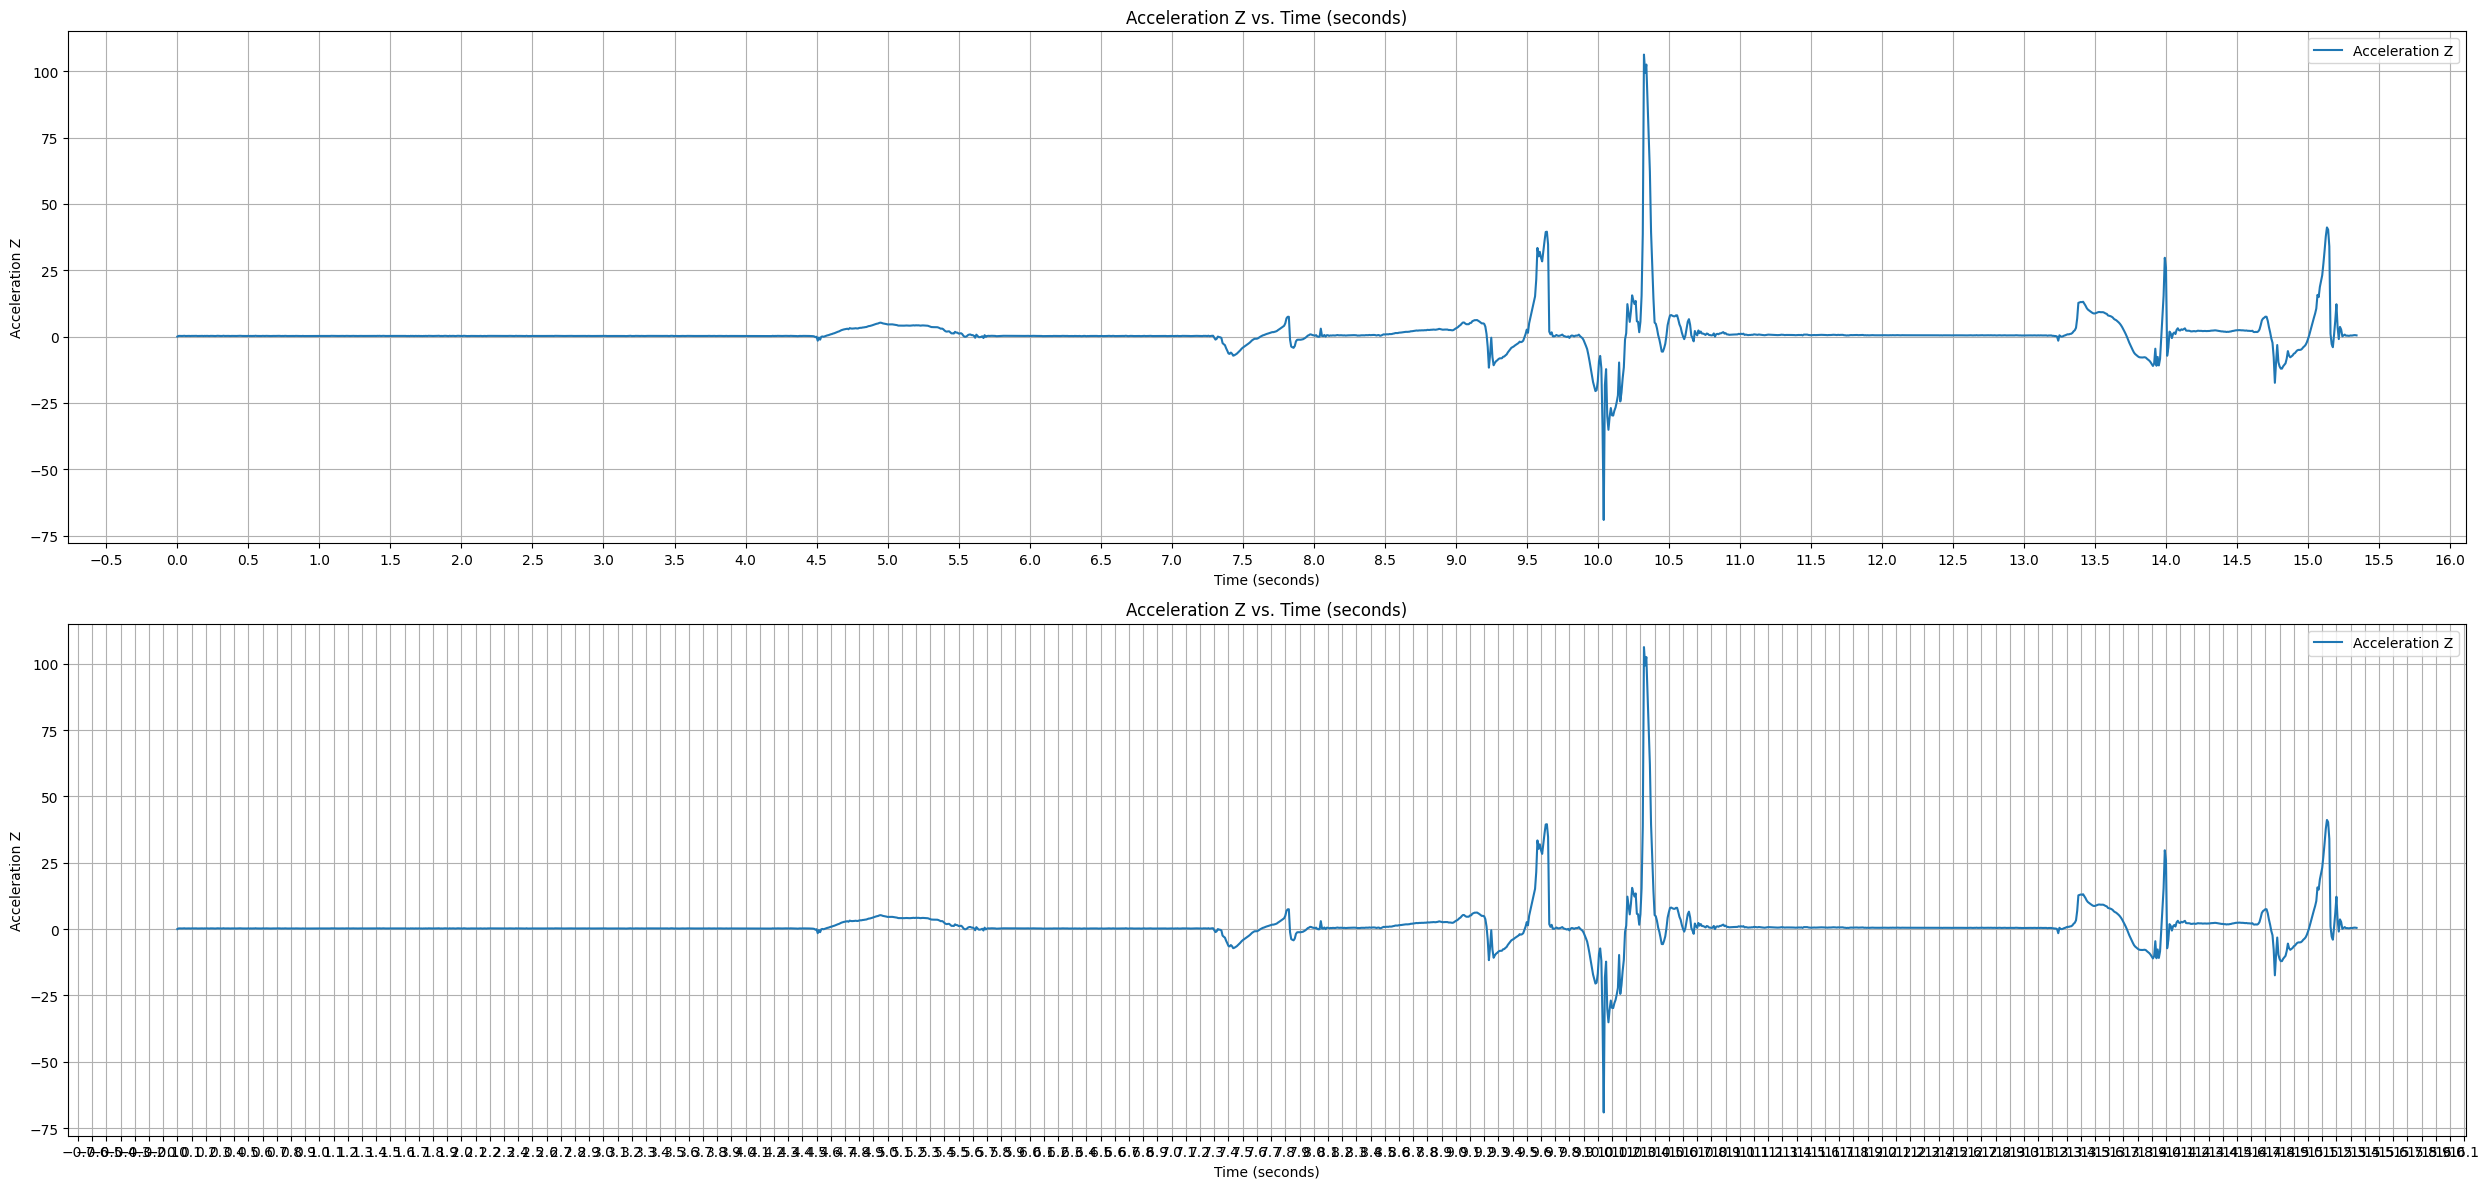

       PacketCounter  SampleTimeFine  Euler_X  Euler_Y  Euler_Z  Acc_X  Acc_Y  \
0                  0      2936795545     0.68   -87.95  -168.34   0.00   0.00   
1                  1      2936803878     0.73   -87.95  -168.39   9.79  -0.10   
2                  2      2936812211     0.72   -87.95  -168.38   9.85  -0.09   
3                  3      2936820544     0.74   -87.95  -168.39   9.86  -0.10   
4                  4      2936828877     0.68   -87.96  -168.33   9.83  -0.09   
...              ...             ...      ...      ...      ...    ...    ...   
12520           1837      3218267619    -8.30   -83.36   161.18   9.73  -0.64   
12521           1838      3218275952    -8.59   -83.31   161.49   9.61  -0.49   
12522           1839      3218284285    -8.68   -83.27   161.59   9.69  -0.58   
12523           1840      3218292618    -8.50   -83.26   161.42   9.55  -0.63   
12524           1841      3218300951    -8.09   -83.25   161.01   9.70  -0.44   

       Acc_Z  Gyr_X  Gyr_Y 

In [225]:
import os
import pandas as pd
import numpy as np

# Define the folder containing the CSV files
folder_path = '../P4/IMU/shots/Foot_left'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Initialize a list to store the times of maximum changes in gradient
max_time_changes = []

# Loop through each CSV file
for csv_file in csv_files:
    # Read the CSV file
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Append the time_seconds column
    df['time_seconds'] = df.index * (1/120)
    
    # Calculate the Acc_Z_derivative column
    df['Acc_Z_derivative'] = np.gradient(df['Acc_Z'], df['time_seconds'])
    
    # Calculate the change_in_gradient column
    df['change_in_gradient'] = np.diff(df['Acc_Z_derivative'], prepend=df['Acc_Z_derivative'][0])
    
    # Set the threshold and skip points
    threshold = 10
    skip_points = 50
    
    # Create a mask for significant changes in gradient
    mask = np.abs(df['change_in_gradient']) > threshold
    adjusted_mask = np.zeros_like(mask, dtype=bool)
    adjusted_mask[skip_points:] = mask[skip_points:]
    
    # Extract the relevant data points
    time_seconds_high_change = df['time_seconds'][adjusted_mask]
    acc_z_high_change = df['Acc_Z'][adjusted_mask]
    change_in_gradient_high_change = df['change_in_gradient'][adjusted_mask]
    
    # Get the first 10 changes in gradient
    first_10_count = 10
    time_seconds_first_10 = time_seconds_high_change.head(first_10_count)
    acc_z_first_10 = acc_z_high_change.head(first_10_count)
    change_in_gradient_first_10 = change_in_gradient_high_change.head(first_10_count)
    
    # Find the maximum change in gradient among the first 10
    max_change_index = change_in_gradient_first_10.abs().idxmax()
    max_time = time_seconds_first_10.loc[max_change_index]
    max_change = change_in_gradient_first_10.loc[max_change_index]
    
    # Print the results
    print(f"First 10 changes in gradient for {csv_file} (excluding the first 50 points):")
    for t, acc, change in zip(time_seconds_first_10, acc_z_first_10, change_in_gradient_first_10):
        print(f"Time: {t:.2f} s, Acceleration Z: {acc:.2f}, Change in Gradient: {change:.2f}")
    
    print(f"\nAbsolute maximum change in gradient: {max_change:.2f} at Time: {max_time:.2f} s\n")
    
    # Store the time of the maximum change
    max_time_changes.append(max_time)
    
    # Plot the data before combining
    fig, axs = plt.subplots(2, 1, figsize=(25, 12))

    # Plotting on the first subplot
    axs[0].plot(df['time_seconds'], df['Acc_Z'], label='Acceleration Z')
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('Acceleration Z')
    axs[0].set_title('Acceleration Z vs. Time (seconds)')
    axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    axs[0].legend()
    axs[0].grid(True)

    # Setting up the second subplot with specific x-axis locators
    axs[1].plot(df['time_seconds'], df['Acc_Z'], label='Acceleration Z')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('Acceleration Z')
    axs[1].set_title('Acceleration Z vs. Time (seconds)')
    axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()
    
    # Append the current DataFrame to the combined DataFrame
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Print the combined DataFrame
print(combined_data)

# Print the list of maximum time changes
print("List of times with maximum changes in gradient for each file:")
print(max_time_changes)

In [226]:
def euler_to_rotation_matrix(roll, pitch, yaw):
    roll, pitch, yaw = np.radians([roll, pitch, yaw])
    
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])

    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])

    Rz = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    R = Rz @ Ry @ Rx
    return R
def gravity_vector_in_sensor_frame(roll, pitch, yaw):
    g = 9.81 
    g_global = np.array([0, 0, -g])
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    g_sensor = R.T @ g_global  
    return g_sensor
def convert_and_correct_acceleration(acc_x, acc_y, acc_z, roll, pitch, yaw):
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    g_sensor = gravity_vector_in_sensor_frame(roll, pitch, yaw)
    acceleration_sensor_frame = np.array([acc_x, acc_y, acc_z])
    acceleration_corrected = acceleration_sensor_frame - g_sensor
    acceleration_global = R @ acceleration_corrected
    return acceleration_global


def apply_conversion(row):
    acc_x, acc_y, acc_z = row['Acc_X'], row['Acc_Y'], row['Acc_Z']
    roll, pitch, yaw = row['Euler_X'], row['Euler_Y'], row['Euler_Z']
    return pd.Series(convert_and_correct_acceleration(acc_x, acc_y, acc_z, roll, pitch, yaw),
                     index=['Acc_Global_X', 'Acc_Global_Y', 'Acc_Global_Z'])


In [227]:
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = lfilter(b, a, data)
    return y

In [228]:
arm_folder_path = '../P4/IMU/shots/Arm'

arm_csv_files = [file for file in os.listdir(arm_folder_path) if file.endswith('.csv')]
# Define the rolling window size
window_size = 5



# Iterate through each arm CSV file and process it
for csv_file, max_time in zip(arm_csv_files, max_time_changes):
    # Read the CSV file
    file_path = os.path.join(arm_folder_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Calculate the time_seconds column
    df['time_seconds'] = df.index * (1/120)
    
    # Filter out data points with time_seconds less than max_time
    df_filtered = df[df['time_seconds'] >= max_time]
    
    # Reset the index and recalculate time_seconds
    df_filtered = df_filtered.reset_index(drop=True)
    df_filtered['time_seconds'] = df_filtered.index * (1/120)
    
    # Remove unnamed columns and specific columns if present
    df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.contains('^Unnamed')]
    df_filtered = df_filtered.drop(columns=['PacketCounter', 'SampleTimeFine'], errors='ignore') 


    fs = 120
    cutoff = 0.1  # Example cutoff frequency for high-pass filter
    # Apply high-pass filter
    df_filtered['filtered_accel_x'] = highpass_filter(df_filtered['Acc_X'], cutoff, fs)
    df_filtered['filtered_accel_y'] = highpass_filter(df_filtered['Acc_Y'], cutoff, fs)
    df_filtered['filtered_accel_z'] = highpass_filter(df_filtered['Acc_Z'], cutoff, fs)

    # Initialize velocity and displacement arrays
    velocity_x = [0]
    velocity_y = [0]
    velocity_z = [0]
    displacement_x = [0]
    displacement_y = [0]
    displacement_z = [0]

    dt = 1 / fs

    # Iterate over the DataFrame to compute velocities and displacements
    for i in range(1, len(df_filtered)):
        velocity_x.append(velocity_x[-1] + df_filtered['filtered_accel_x'][i] * dt)
        velocity_y.append(velocity_y[-1] + df_filtered['filtered_accel_y'][i] * dt)
        velocity_z.append(velocity_z[-1] + df_filtered['filtered_accel_z'][i] * dt)
        

        displacement_x.append(displacement_x[-1] + velocity_x[i] * dt)
        displacement_y.append(displacement_y[-1] + velocity_y[i] * dt)
        displacement_z.append(displacement_z[-1] + velocity_z[i] * dt)

    # Add the computed values to the DataFrame
    df_filtered['Vel_X'] = velocity_x
    df_filtered['Vel_Y'] = velocity_y
    df_filtered['Vel_Z'] = velocity_z
    df_filtered['Displacement_X'] = displacement_x
    df_filtered['Displacement_Y'] = displacement_y
    df_filtered['Displacement_Z'] = displacement_z






    df_filtered[['Acc_Global_X', 'Acc_Global_Y', 'Acc_Global_Z']] = df_filtered.apply(apply_conversion, axis=1)
    # Add rolling window statistics
    # df_filtered['Acc_Global_X_Roll_Mean'] = df_filtered['Acc_Global_X'].rolling(window=window_size).mean()
    # df_filtered['Acc_Global_Y_Roll_Mean'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).mean()
    # df_filtered['Acc_Global_Z_Roll_Mean'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).mean()
    sampling_rate = 120  # Hz
    dt = 1 / sampling_rate  # Time interval in seconds

    # Compute the derivative using the difference between consecutive rows
    df_filtered['Dy_dt'] = df_filtered['Acc_Y'].diff() / dt
    df_filtered['Dz_dt'] = df_filtered['Acc_Z'].diff() / dt
    df_filtered['Dx_dt'] = df_filtered['Acc_X'].diff() / dt

    df_filtered['Vel_X_Roll_Mean'] = df_filtered['Vel_X'].rolling(window=window_size).mean()
    df_filtered['Vel_Y_Roll_Mean'] = df_filtered['Vel_Y'].rolling(window=window_size).mean()
    df_filtered['Vel_Z_Roll_Mean'] = df_filtered['Vel_Z'].rolling(window=window_size).mean()
    
    df_filtered['Acc_Global_X_Roll_Std'] = df_filtered['Acc_X'].rolling(window=window_size).std()
    df_filtered['Acc_Global_Y_Roll_Std'] = df_filtered['Acc_Y'].rolling(window=window_size).std()
    df_filtered['Acc_Global_Z_Roll_Std'] = df_filtered['Acc_Z'].rolling(window=window_size).std()
    
    df_filtered['Vel_X_Roll_Std'] = df_filtered['Vel_X'].rolling(window=window_size).std()
    df_filtered['Vel_Y_Roll_Std'] = df_filtered['Vel_Y'].rolling(window=window_size).std()
    df_filtered['Vel_Z_Roll_Std'] = df_filtered['Vel_Z'].rolling(window=window_size).std()
    
    df_filtered['Acc_Global_X_Roll_Sum'] = df_filtered['Acc_X'].rolling(window=window_size).sum()
    df_filtered['Acc_Global_Y_Roll_Sum'] = df_filtered['Acc_Y'].rolling(window=window_size).sum()
    df_filtered['Acc_Global_Z_Roll_Sum'] = df_filtered['Acc_Z'].rolling(window=window_size).sum()
    
    df_filtered['Vel_X_Roll_Sum'] = df_filtered['Vel_X'].rolling(window=window_size).sum()
    df_filtered['Vel_Y_Roll_Sum'] = df_filtered['Vel_Y'].rolling(window=window_size).sum()
    df_filtered['Vel_Z_Roll_Sum'] = df_filtered['Vel_Z'].rolling(window=window_size).sum()
    
    df_filtered['Acc_Global_X_Roll_Max'] = df_filtered['Acc_X'].rolling(window=window_size).max()
    df_filtered['Acc_Global_Y_Roll_Max'] = df_filtered['Acc_Y'].rolling(window=window_size).max()
    df_filtered['Acc_Global_Z_Roll_Max'] = df_filtered['Acc_Z'].rolling(window=window_size).max()
    
    df_filtered['Vel_X_Roll_Max'] = df_filtered['Vel_X'].rolling(window=window_size).max()
    df_filtered['Vel_Y_Roll_Max'] = df_filtered['Vel_Y'].rolling(window=window_size).max()
    df_filtered['Vel_Z_Roll_Max'] = df_filtered['Vel_Z'].rolling(window=window_size).max()
    
    # # df_filtered['Acc_Global_X_Roll_Min'] = df_filtered['Acc_Global_X'].rolling(window=window_size).min()
    # # df_filtered['Acc_Global_Y_Roll_Min'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).min()
    # # df_filtered['Acc_Global_Z_Roll_Min'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).min()
    
    df_filtered['Vel_X_Roll_Min'] = df_filtered['Vel_X'].rolling(window=window_size).min()
    df_filtered['Vel_Y_Roll_Min'] = df_filtered['Vel_Y'].rolling(window=window_size).min()
    df_filtered['Vel_Z_Roll_Min'] = df_filtered['Vel_Z'].rolling(window=window_size).min()
    

    df_filtered['Displacement_X_Roll_Mean'] = df_filtered['Displacement_X'].rolling(window=window_size).mean()
    df_filtered['Displacement_Y_Roll_Mean'] = df_filtered['Displacement_Y'].rolling(window=window_size).mean()
    df_filtered['Displacement_Z_Roll_Mean'] = df_filtered['Displacement_Z'].rolling(window=window_size).mean()
    

    df_filtered['Displacement_X_Roll_Std'] = df_filtered['Displacement_X'].rolling(window=window_size).std()
    df_filtered['Displacement_Y_Roll_Std'] = df_filtered['Displacement_Y'].rolling(window=window_size).std()
    df_filtered['Displacement_Z_Roll_Std'] = df_filtered['Displacement_Z'].rolling(window=window_size).std()
    

    df_filtered['Displacement_X_Roll_Sum'] = df_filtered['Displacement_X'].rolling(window=window_size).sum()
    df_filtered['Displacement_Y_Roll_Sum'] = df_filtered['Displacement_Y'].rolling(window=window_size).sum()
    df_filtered['Displacement_Z_Roll_Sum'] = df_filtered['Displacement_Z'].rolling(window=window_size).sum()

    df_filtered['Displacement_X_Roll_Max'] = df_filtered['Displacement_X'].rolling(window=window_size).max()
    df_filtered['Displacement_Y_Roll_Max'] = df_filtered['Displacement_Y'].rolling(window=window_size).max()
    df_filtered['Displacement_Z_Roll_Max'] = df_filtered['Displacement_Z'].rolling(window=window_size).max()
    
    # # df_filtered['Acc_Global_X_Roll_Min'] = df_filtered['Acc_Global_X'].rolling(window=window_size).min()
    # # df_filtered['Acc_Global_Y_Roll_Min'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).min()
    # # df_filtered['Acc_Global_Z_Roll_Min'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).min()
    
    df_filtered['Displacement_X_Roll_Min'] = df_filtered['Displacement_X'].rolling(window=window_size).min()
    df_filtered['Displacement_Y_Roll_Min'] = df_filtered['Displacement_Y'].rolling(window=window_size).min()
    df_filtered['Displacement_Z_Roll_Min'] = df_filtered['Displacement_Z'].rolling(window=window_size).min()
    
    # df_filtered['Acc_Global_X_Magnitude'] = (df_filtered['Acc_Global_X']**2 + df_filtered['Acc_Global_Y']**2 + df_filtered['Acc_Global_Z']**2)**0.5
    # df_filtered['Vel_X_Magnitude'] = (df_filtered['Vel_X']**2 + df_filtered['Vel_Y']**2 + df_filtered['Vel_Z']**2)**0.5
    # Save the filtered and feature-engineered DataFrame to a new CSV file
    filtered_file_path = os.path.join(arm_folder_path, f"filtered_{csv_file}")
    df_filtered.to_csv(filtered_file_path, index=False)
    
    print(f"Feature-engineered data for {csv_file} saved to {filtered_file_path}")
    print(df_filtered)

Feature-engineered data for Shot1.csv saved to ../P4/IMU/shots/Arm\filtered_Shot1.csv
      Euler_X  Euler_Y  Euler_Z  Acc_X  Acc_Y  Acc_Z  Gyr_X  Gyr_Y  Gyr_Z  \
0     -134.57     8.10    18.45  -1.04  -7.56  -7.33   5.92   5.61  -8.82   
1     -134.53     8.01    18.46  -1.03  -7.72  -7.37   6.03   4.83  -8.57   
2     -134.49     7.94    18.48  -1.00  -7.66  -7.28   6.97   3.78  -8.88   
3     -134.43     7.86    18.50  -0.93  -7.48  -7.26   7.56   2.84  -9.21   
4     -134.38     7.79    18.53  -0.95  -7.35  -7.27   7.60   2.43  -9.01   
...       ...      ...      ...    ...    ...    ...    ...    ...    ...   
1051   -63.15   -42.70     4.93  11.51  -0.76  -2.24  14.70 -29.03 165.54   
1052   -63.79   -41.60     6.12  11.03  -0.50  -2.23  21.39 -36.16 163.87   
1053   -64.36   -40.54     7.33  10.57  -0.34  -2.34  28.14 -43.84 160.77   
1054   -64.90   -39.53     8.56  10.26  -0.15  -2.30  33.56 -51.18 157.04   
1055   -65.38   -38.57     9.81  10.07   0.02  -2.32  38.21 -57.95 

In [229]:
import os
import pandas as pd
import random

# Define the mapping between Vicon files and arm files
vicon_to_arm_mapping = {
    'Actual_P4_01.csv': 'filtered_Shot1.csv',
    'Actual_P4_02.csv': 'filtered_Shot2.csv',
    'Actual_P4_03.csv': 'filtered_Shot3.csv',
    'Actual_P4_04.csv': 'filtered_Shot4.csv',
    'Actual_P4_05.csv': 'filtered_Shot5.csv',
    'Actual_P4_06.csv': 'filtered_Shot6.csv',
    'Actual_P4_07.csv': 'filtered_Shot7.csv',
    'Actual_P4_10.csv': 'filtered_Shot10.csv'
    # 'Actual_P4_11.csv': 'filtered_Shot11.csv',
}

# Convert the mapping to a list and shuffle it
vicon_to_arm_list = list(vicon_to_arm_mapping.items())
random.shuffle(vicon_to_arm_list)

# Define the folder containing the Vicon CSV files
vicon_folder_path = '../P4/IMU/shots/Vicon'
arm_folder_path = '../P4/IMU/shots/Arm'  # Assuming this is the folder containing the arm CSV files

# Initialize lists to store DataFrames
train_dfs = []
test_df = None
test_file = None

for i, (vicon_file, arm_file) in enumerate(vicon_to_arm_list):
    # Define the file paths
    vicon_file_path = os.path.join(vicon_folder_path, vicon_file)
    arm_file_path = os.path.join(arm_folder_path, arm_file)
    
    # Check if the arm file exists
    if not os.path.isfile(arm_file_path):
        print(f"Arm file {arm_file} not found.")
        continue
    
    # Read the Vicon and arm files
    try:
        vicon_df = pd.read_csv(vicon_file_path)
        arm_df = pd.read_csv(arm_file_path)
    except Exception as e:
        print(f"Error reading files {vicon_file} or {arm_file}: {e}")
        continue
    
    # Scale the 'Z' column in the Vicon DataFrame to start from 0 by subtracting the first value
    if 'Z' in vicon_df.columns:
        first_value = vicon_df['Z'].iloc[0]
        vicon_df['Z'] = vicon_df['Z'] - first_value
    else:
        print(f"'Z' column not found in Vicon file {vicon_file}.")
    
    # Calculate the number of rows to drop from the end of whichever dataset is larger
    if len(vicon_df) > len(arm_df):
        rows_to_drop = len(vicon_df) - len(arm_df)
        vicon_df = vicon_df.iloc[:-rows_to_drop]
    elif len(arm_df) > len(vicon_df):
        rows_to_drop = len(arm_df) - len(vicon_df)
        arm_df = arm_df.iloc[:-rows_to_drop]
    
    # Align the Vicon data with the arm data
    combined_df = pd.concat([arm_df, vicon_df], axis=1)
    
    # Remove unnamed columns if present
    combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]
    
    # Drop the 'time' column if it exists
    if 'time' in combined_df.columns:
        combined_df = combined_df.drop(columns=['time'])
    
    # Append to training data or set as test data
    if i < len(vicon_to_arm_list) - 1:
        train_dfs.append(combined_df)
    else:
        test_df = combined_df
        test_file = arm_file
    
    print(f"Processed {arm_file} and appended Vicon data")

# Combine all training DataFrames
if train_dfs:
    train_df = pd.concat(train_dfs, ignore_index=True)
    # Save the training set
    train_path = os.path.join(arm_folder_path, 'train.csv')
    train_df.to_csv(train_path, index=False)
    print(f"Training data saved to {train_path}")

# Save the test set
if test_df is not None:
    test_path = os.path.join(arm_folder_path, 'test.csv')
    test_df.to_csv(test_path, index=False)
    print(f"Test data saved to {test_path}")
    print(f"The test dataset is {test_file}")

print("All files have been processed and combined.")


Processed filtered_Shot3.csv and appended Vicon data
Processed filtered_Shot6.csv and appended Vicon data
Processed filtered_Shot4.csv and appended Vicon data
Processed filtered_Shot5.csv and appended Vicon data
Processed filtered_Shot7.csv and appended Vicon data
Processed filtered_Shot1.csv and appended Vicon data
Processed filtered_Shot10.csv and appended Vicon data
Processed filtered_Shot2.csv and appended Vicon data
Training data saved to ../P4/IMU/shots/Arm\train.csv
Test data saved to ../P4/IMU/shots/Arm\test.csv
The test dataset is filtered_Shot2.csv
All files have been processed and combined.


Train =       Euler_X  Euler_Y  Euler_Z  Acc_X  Acc_Y  Acc_Z  Gyr_X  Gyr_Y  Gyr_Z  \
0     -135.41    19.46    19.95  -3.56  -7.12  -7.06  -1.36   2.26  -3.51   
1     -135.42    19.42    19.96  -3.47  -6.84  -7.22   0.58   2.07  -3.94   
2     -135.45    19.38    19.95  -3.38  -6.82  -7.25  -1.62   2.99  -3.67   
3     -135.50    19.33    19.94  -3.41  -7.34  -7.21  -3.15   3.92  -3.62   
4     -135.53    19.28    19.93  -3.48  -7.59  -7.17  -1.72   4.58  -4.25   
...       ...      ...      ...    ...    ...    ...    ...    ...    ...   
6823   -61.64   -10.81    12.54   7.95  -0.52  -1.86 -60.33  91.44 125.51   
6824   -62.14    -9.60    12.40   7.59  -0.48  -1.83 -61.61  83.35 119.88   
6825   -62.65    -8.46    12.27   7.19  -0.35  -1.80 -62.81  75.38 113.97   
6826   -63.18    -7.39    12.16   6.84  -0.27  -1.77 -62.74  68.93 107.76   
6827   -63.69    -6.39    12.07   6.48  -0.16  -1.69 -60.92  63.10 101.42   

      time_seconds  ...  Displacement_Z_Roll_Sum  Displacement_X_Ro

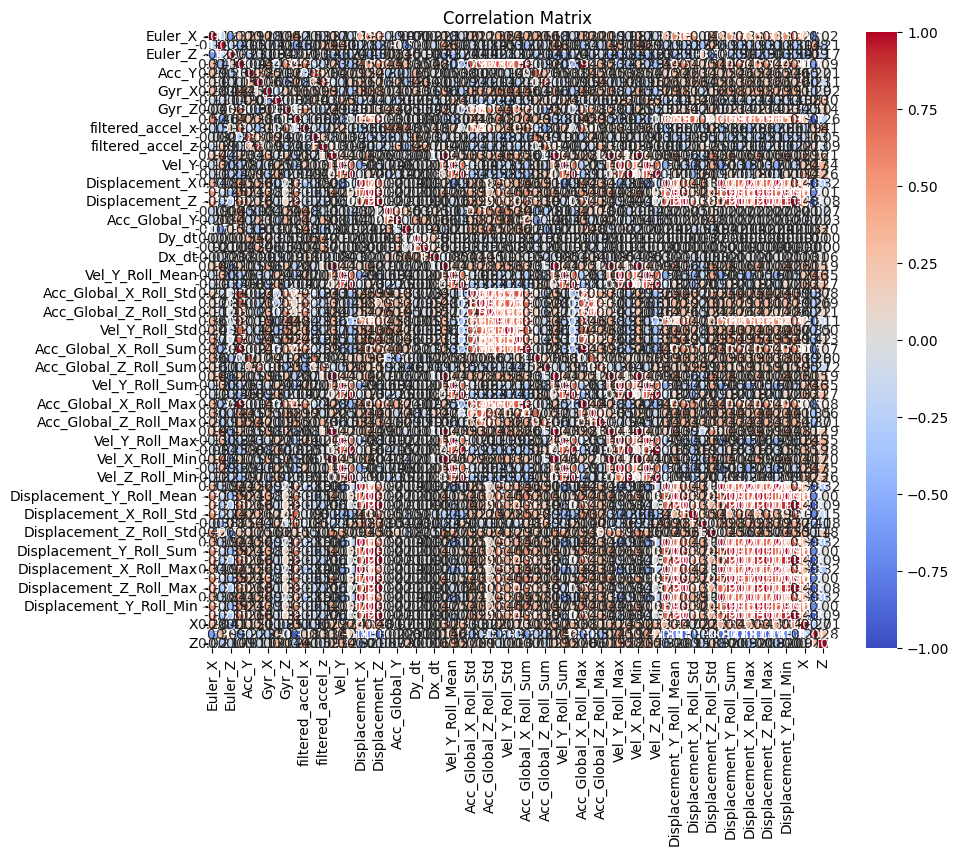

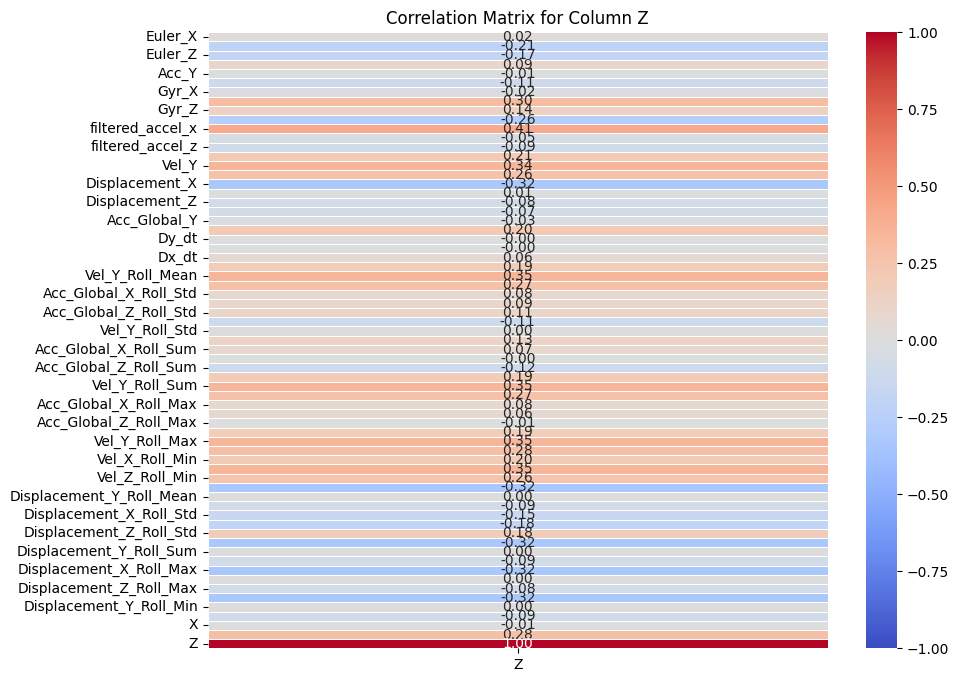

Correlations with column 'Z' greater than 0.15:
['Gyr_Y']
Correlation between Gyr_Y and Z: 0.30
['Gyr_Y', 'time_seconds']
Correlation between time_seconds and Z: -0.26
['Gyr_Y', 'time_seconds', 'filtered_accel_x']
Correlation between filtered_accel_x and Z: 0.41
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y']
Correlation between Vel_Y and Z: 0.34
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z']
Correlation between Vel_Z and Z: 0.26
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X']
Correlation between Displacement_X and Z: -0.32
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X', 'Vel_Y_Roll_Mean']
Correlation between Vel_Y_Roll_Mean and Z: 0.35
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X', 'Vel_Y_Roll_Mean', 'Vel_Z_Roll_Mean']
Correlation between Vel_Z_Roll_Mean and Z: 0.27
['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X', 'Vel_Y_Roll_M

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([train_df,test_df], ignore_index=True)
print(f'Train = {train_df}')
print(f'test = {test_df}')



corr_matrix = combined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title(f'Correlation Matrix')
plt.show()


Z_column = 'Z'



if Z_column not in corr_matrix.columns:
    print(f"Column '{Z_column}' does not exist in the DataFrame.")
else:
    Z_corr = corr_matrix[[Z_column]]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(Z_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix for Column {Z_column}')
    plt.show()

    high_corr_Z = Z_corr.abs() > 0.25  
    high_corr_Z_pairs = [(i, Z_corr.loc[i, Z_column]) for i in high_corr_Z.index if high_corr_Z.loc[i, Z_column]]
    i_list = []

    print(f"Correlations with column '{Z_column}' greater than 0.15:")
    for i, corr in high_corr_Z_pairs:
        i_list.append(i)
        print(i_list)
        print(f"Correlation between {i} and {Z_column}: {corr:.2f}")


In [231]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

print(f'train={train_df}')
print(f'test = {test_df}')

X_train = train_df[['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X', 'Vel_Y_Roll_Mean', 'Vel_Z_Roll_Mean', 'Vel_Y_Roll_Sum', 'Vel_Z_Roll_Sum', 'Vel_Y_Roll_Max', 'Vel_Z_Roll_Max', 'Vel_Y_Roll_Min', 'Vel_Z_Roll_Min', 'Displacement_X_Roll_Mean', 'Displacement_X_Roll_Sum', 'Displacement_X_Roll_Max', 'Displacement_X_Roll_Min']]
y_train = train_df['Z']
X_test = test_df[['Gyr_Y', 'time_seconds', 'filtered_accel_x', 'Vel_Y', 'Vel_Z', 'Displacement_X', 'Vel_Y_Roll_Mean', 'Vel_Z_Roll_Mean', 'Vel_Y_Roll_Sum', 'Vel_Z_Roll_Sum', 'Vel_Y_Roll_Max', 'Vel_Z_Roll_Max', 'Vel_Y_Roll_Min', 'Vel_Z_Roll_Min', 'Displacement_X_Roll_Mean', 'Displacement_X_Roll_Sum', 'Displacement_X_Roll_Max', 'Displacement_X_Roll_Min']]
y_test = test_df['Z']
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"First few rows of scaled training features:\n{X_train_scaled_df.head()}")
print(f"First few rows of scaled testing features:\n{X_test_scaled_df.head()}")




train=      Euler_X  Euler_Y  Euler_Z  Acc_X  Acc_Y  Acc_Z  Gyr_X  Gyr_Y  Gyr_Z  \
0     -135.41    19.46    19.95  -3.56  -7.12  -7.06  -1.36   2.26  -3.51   
1     -135.42    19.42    19.96  -3.47  -6.84  -7.22   0.58   2.07  -3.94   
2     -135.45    19.38    19.95  -3.38  -6.82  -7.25  -1.62   2.99  -3.67   
3     -135.50    19.33    19.94  -3.41  -7.34  -7.21  -3.15   3.92  -3.62   
4     -135.53    19.28    19.93  -3.48  -7.59  -7.17  -1.72   4.58  -4.25   
...       ...      ...      ...    ...    ...    ...    ...    ...    ...   
6823   -61.64   -10.81    12.54   7.95  -0.52  -1.86 -60.33  91.44 125.51   
6824   -62.14    -9.60    12.40   7.59  -0.48  -1.83 -61.61  83.35 119.88   
6825   -62.65    -8.46    12.27   7.19  -0.35  -1.80 -62.81  75.38 113.97   
6826   -63.18    -7.39    12.16   6.84  -0.27  -1.77 -62.74  68.93 107.76   
6827   -63.69    -6.39    12.07   6.48  -0.16  -1.69 -60.92  63.10 101.42   

      time_seconds  ...  Displacement_Z_Roll_Sum  Displacement_X_Roll

In [232]:
from lazypredict.Supervised import LazyRegressor

import numpy as np
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_regressor = RandomForestRegressor(
    n_estimators=35,
    random_state=42,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=20,
    bootstrap=True,
    oob_score=True,
)
rf_regressor.fit(X_train_scaled, y_train) 

y_pred = rf_regressor.predict(X_test_scaled)  

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f'RMSE = {rmse}')
print(f"R^2 Score: {r2:.2f}")

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(f"First few rows of actual vs predicted values:\n{results_df.head()}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score


time_limit = 20
filtered_indices = X_test['time_seconds'] <= time_limit

X_test_filtered = X_test[filtered_indices]
y_test_filtered = y_test[filtered_indices]
y_pred_filtered = y_pred[filtered_indices]


mse = mean_squared_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

plot_data = pd.DataFrame({
    'time_seconds': X_test_filtered['time_seconds'].values,
    'Actual Rcar_Z': y_test_filtered.values,
    'Predicted Rcar_Z': y_pred_filtered
})

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()


window_size = 20
plot_data['Smoothed Predicted Rcar_Z'] = moving_average(plot_data['Predicted Rcar_Z'], window_size)

valid_indices = ~plot_data['Smoothed Predicted Rcar_Z'].isna()
actual_filtered = plot_data['Actual Rcar_Z'][valid_indices]
smoothed_predicted_filtered = plot_data['Smoothed Predicted Rcar_Z'][valid_indices]

smoothed_mse = mean_squared_error(actual_filtered, smoothed_predicted_filtered)
smoothed_rmse = math.sqrt(smoothed_mse)

print(f"Smoothed Root Mean Squared Error: {smoothed_rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Smoothed Predicted Rcar_Z'], label='Smoothed Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Smoothed Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Predicted Rcar_Z'], label='Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


linear_regressor = LinearRegression()


linear_regressor.fit(X_train_scaled, y_train)


y_pred_train_lr = linear_regressor.predict(X_train_scaled)
y_pred_test_lr = linear_regressor.predict(X_test_scaled)


train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)
train_r2_lr = r2_score(y_train, y_pred_train_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)

print("Linear Regression Results")
print(f"Training MSE: {train_mse_lr}")
print(f"Testing MSE: {test_mse_lr}")
print(f"Training R2 Score: {train_r2_lr}")
print(f"Testing R2 Score: {test_r2_lr}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score

time_limit = 20
filtered_indices = X_test['time_seconds'] <= time_limit

X_test_filtered = X_test[filtered_indices]
y_test_filtered = y_test[filtered_indices]
y_pred_filtered = y_pred_test_lr [filtered_indices]

mse = mean_squared_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


plot_data = pd.DataFrame({
    'time_seconds': X_test_filtered['time_seconds'].values,
    'Actual Rcar_Z': y_test_filtered.values,
    'Predicted Rcar_Z': y_pred_filtered
})

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()


window_size = 5 
plot_data['Smoothed Predicted Rcar_Z'] = moving_average(plot_data['Predicted Rcar_Z'], window_size)
valid_indices = ~plot_data['Smoothed Predicted Rcar_Z'].isna()
actual_filtered = plot_data['Actual Rcar_Z'][valid_indices]
smoothed_predicted_filtered = plot_data['Smoothed Predicted Rcar_Z'][valid_indices]


smoothed_mse = mean_squared_error(actual_filtered, smoothed_predicted_filtered)
smoothed_rmse = math.sqrt(smoothed_mse)

print(f"Smoothed Root Mean Squared Error: {smoothed_rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Smoothed Predicted Rcar_Z'], label='Smoothed Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Predicted Rcar_Z'], label='Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(X_train_scaled, y_train)


y_pred_test_dt = tree_regressor.predict(X_test_scaled)

# train_mse_dt = mean_squared_error(y_train, y_pred_train_dt)
test_mse_dt = mean_squared_error(y_test, y_pred_test_dt)
# train_r2_dt = r2_score(y_train, y_pred_train_dt)
test_r2_dt = r2_score(y_test, y_pred_test_dt)

print("Decision Tree Regressor Results")
# print(f"Training MSE: {train_mse_dt}")
print(f"Testing MSE: {test_mse_dt}")
# print(f"Training R2 Score: {train_r2_dt}")
print(f"Testing R2 Score: {test_r2_dt}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score
time_limit = 20
filtered_indices = X_test['time_seconds'] <= time_limit

X_test_filtered = X_test[filtered_indices]
y_test_filtered = y_test[filtered_indices]
y_pred_filtered = y_pred_test_dt[filtered_indices]

mse = mean_squared_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

plot_data = pd.DataFrame({
    'time_seconds': X_test_filtered['time_seconds'].values,
    'Actual Rcar_Z': y_test_filtered.values,
    'Predicted Rcar_Z': y_pred_filtered
})

def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

window_size = 5  
plot_data['Smoothed Predicted Rcar_Z'] = moving_average(plot_data['Predicted Rcar_Z'], window_size)

valid_indices = ~plot_data['Smoothed Predicted Rcar_Z'].isna()
actual_filtered = plot_data['Actual Rcar_Z'][valid_indices]
smoothed_predicted_filtered = plot_data['Smoothed Predicted Rcar_Z'][valid_indices]

smoothed_mse = mean_squared_error(actual_filtered, smoothed_predicted_filtered)
smoothed_rmse = math.sqrt(smoothed_mse)

print(f"Smoothed Root Mean Squared Error: {smoothed_rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Smoothed Predicted Rcar_Z'], label='Smoothed Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Predicted Rcar_Z'], label='Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(window_size, len(X)): 
        Xs.append(X.iloc[i-window_size:i].values)
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
window_size = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled_df, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled_df, y_test, window_size)
X_train_seq = np.array(X_train_seq, dtype=np.float32)
y_train_seq = np.array(y_train_seq, dtype=np.float32)
X_test_seq = np.array(X_test_seq, dtype=np.float32)
y_test_seq = np.array(y_test_seq, dtype=np.float32)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_seq = scaler_X.fit_transform(X_train_seq.reshape(-1, X_train_seq.shape[-1])).reshape(X_train_seq.shape)
X_test_seq = scaler_X.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1])).reshape(X_test_seq.shape)
y_train_seq = scaler_y.fit_transform(y_train_seq.reshape(-1, 1)).reshape(-1)
y_test_seq = scaler_y.transform(y_test_seq.reshape(-1, 1)).reshape(-1)


def build_model(architecture='basic'):
    model = Sequential()
    if architecture == 'basic':
        model.add(LSTM(50, input_shape=(window_size, X_train_seq.shape[2]), kernel_regularizer=l2(0.2)))
    elif architecture == 'bidirectional':
        model.add(Bidirectional(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.5)), input_shape=(window_size, X_train_seq.shape[2])))
        model.add(Dropout(0.1))
        model.add(LSTM(32, kernel_regularizer=l2(0.5)))
    elif architecture == 'bidirectional_dropout':
        model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.5)), input_shape=(window_size, X_train_seq.shape[2])))
        model.add(Dropout(0.7))
        model.add(LSTM(32, kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.7))
    else:
        raise ValueError('Unknown architecture')
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


def evaluate_model(model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
    mse_test = model.evaluate(X_test_seq, y_test_seq, verbose=0)
    rmse_test = np.sqrt(mse_test)
    return rmse_test


architectures = ['basic', 'bidirectional', 'bidirectional_dropout']
results = {}

for arch in architectures:
    print(f"Training model with {arch} architecture...")
    model = build_model(architecture=arch)
    rmse_test = evaluate_model(model)
    results[arch] = rmse_test
    print(f"{arch} model RMSE: {rmse_test}")


best_architecture = min(results, key=results.get)
print(f"Best model architecture: {best_architecture} with RMSE: {results[best_architecture]}")

best_model = build_model(architecture=best_architecture)
best_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
y_pred_seq = best_model.predict(X_test_seq)


y_pred_seq = scaler_y.inverse_transform(y_pred_seq).reshape(-1)
y_test_seq = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).reshape(-1)

time_axis = np.arange(len(y_test_seq))
rmse_test_unscaled = np.sqrt(np.mean((y_test_seq - y_pred_seq) ** 2))
print(f'Test RMSE (unscaled): {rmse_test_unscaled}')

plt.figure(figsize=(12, 6))
plt.plot(time_axis, y_test_seq, label='Actual Values', color='blue')
plt.plot(time_axis, y_pred_seq, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Actual vs. Predicted Values ({best_architecture} model)')
plt.legend()
plt.show()


## Feature engineering to get more features
